In [1]:
from yugiquery import *

header("Cards")

<div align='center'>
    <br>
    <!-- Pre Style needed to fix HTML formatting -->
    <pre style="line-height: var(--jp-code-line-height); font-family: var(--jp-code-font-family)">
    ██    ██ ██    ██  ██████  ██  ██████  ██    ██ ███████ ██████  ██    ██ 
     ██  ██  ██    ██ ██       ██ ██    ██ ██    ██ ██      ██   ██  ██  ██  
      ████   ██    ██ ██   ███ ██ ██    ██ ██    ██ █████   ██████    ████   
       ██    ██    ██ ██    ██ ██ ██ ▄▄ ██ ██    ██ ██      ██   ██    ██    
       ██     ██████   ██████  ██  ██████   ██████  ███████ ██   ██    ██    
                                      ▀▀                                     
    </pre>
</div>
<div align='right'>
    Cards - Execution started 14/05/2023 12:10 UTC <br>
    By <b>Guilherme Ruiz</b>
</div>

---

Table of Contents
=================

*   [1  Data aquisition](#Data-aquisition)
    *   [1.1  Fetch online data](#Fetch-online-data)
    *   [1.2  Merge data](#Merge-data)
*   [2  Check changes](#Check-changes)
    *   [2.1  Load previous data](#Load-previous-data)
    *   [2.2  Generate changelog](#Generate-changelog)
    *   [2.3  Save data](#Save-data)
*   [3  Data visualization](#Data-visualization)
    *   [3.1  Full data](#Full-data)
    *   [3.2  Card types](#Card-types)
    *   [3.3  Monsters](#Monsters)
        *   [3.3.1  Attributes](#Attributes)
        *   [3.3.2  Primary types](#Primary-types)
            *   [3.3.2.1  Has effect discrimination](#Has-effect-discrimination)
            *   [3.3.2.2  Is pendulum discrimination](#Is-pendulum-discrimination)
            *   [3.3.2.3  By attribute](#By-attribute)
        *   [3.3.3  Secondary types](#Secondary-types)
            *   [3.3.3.1  By attribute](#By-attribute)
            *   [3.3.3.2  By secondary type](#By-secondary-type)
        *   [3.3.4  Monster types](#Monster-types)
            *   [3.3.4.1  By Attribute](#By-Attribute)
            *   [3.3.4.2  By primary type](#By-primary-type)
            *   [3.3.4.3  By secondary type](#By-secondary-type)
        *   [3.3.5  Effect type](#Effect-type)
        *   [3.3.6  ATK](#ATK)
        *   [3.3.7  DEF](#DEF)
        *   [3.3.8  Level/Rank](#Level/Rank)
            *   [3.3.8.1  ATK statistics](#ATK-statistics)
            *   [3.3.8.2  DEF statistics](#DEF-statistics)
        *   [3.3.9  Pendulum scale](#Pendulum-scale)
            *   [3.3.9.1  ATK statistics](#ATK-statistics)
            *   [3.3.9.2  DEF statistics](#DEF-statistics)
            *   [3.3.9.3  Level/Rank statistics](#Level/Rank-statistics)
        *   [3.3.10  Link](#Link)
            *   [3.3.10.1  ATK statistics](#ATK-statistics)
        *   [3.3.11  Link Arrows](#Link-Arrows)
            *   [3.3.11.1  By combination](#By-combination)
            *   [3.3.11.2  By unique](#By-unique)
            *   [3.3.11.3  By link](#By-link)
    *   [3.4  Spell & Trap](#Spell-&-Trap)
        *   [3.4.1  Properties](#Properties)
        *   [3.4.2  Effect type](#Effect-type)
            *   [3.4.2.1  Spell & Trap discrimination](#Spell-&-Trap-discrimination)
    *   [3.5  Archseries](#Archseries)
        *   [3.5.1  By card type](#By-card-type)
        *   [3.5.2  By primary type](#By-primary-type)
        *   [3.5.3  By secondary type](#By-secondary-type)
        *   [3.5.4  By monster type](#By-monster-type)
        *   [3.5.5  By property](#By-property)
    *   [3.6  Artworks](#Artworks)
        *   [3.6.1  By card type](#By-card-type)
        *   [3.6.2  By primary type](#By-primary-type)
    *   [3.7  Errata](#Errata)
        *   [3.7.1  By card type](#By-card-type)
        *   [3.7.2  By primary type](#By-primary-type)
        *   [3.7.3  By artwork](#By-artwork)
    *   [3.8  TCG & OCG status](#TCG-&-OCG-status)
        *   [3.8.1  TGC status](#TGC-status)
            *   [3.8.1.1  By card type](#By-card-type)
            *   [3.8.1.2  By monster type](#By-monster-type)
            *   [3.8.1.3  By archseries](#By-archseries)
        *   [3.8.2  OCG status](#OCG-status)
            *   [3.8.2.1  By card type](#By-card-type)
            *   [3.8.2.2  By monster type](#By-monster-type)
            *   [3.8.2.3  By archseries](#By-archseries)
        *   [3.8.3  TCG vs. OCG status](#TCG-vs.-OCG-status)
*   [4  Extras](#Extras)
    *   [4.1 Multiple secondary types](#Multiple-secondary-types)
    *   [4.2 Not yet released](#Not-yet-released)
    *   [4.3 Counters and Tokens](#Counters-and-Tokens)
*   [5  Epilogue](#Epilogue)
    *   [5.1  HTML export](#HTML-export)
<!-- *   [5.2  Git](#Git) -->

# Data aquisition

## Fetch online data

In [2]:
# Timestamp
timestamp = pd.Timestamp.now()

In [3]:
# Fetch Monster
monster_df = fetch_monster()

8132 results


In [4]:
# Fetch Spell
spell_df = fetch_st(st="Spell")

# Fetch Trap
trap_df = fetch_st(st="Trap")

2440 results


1853 results


In [5]:
# Fetch Token
token_df = fetch_token()

# Fetch Counter
counter_df = fetch_counter()

# Fetch errata
errata_df = fetch_errata()

112 results


13 results


4805 results


## Merge data

In [6]:
# Merge errata
monster_df = merge_errata(monster_df, errata_df)
spell_df = merge_errata(spell_df, errata_df)
trap_df = merge_errata(trap_df, errata_df)
token_df = merge_errata(token_df, errata_df)
counter_df = merge_errata(counter_df, errata_df)

# Add counters to tokens data frame
token_df = (
    pd.concat([token_df, counter_df], ignore_index=True, axis=0)
    .drop_duplicates()
    .sort_values("Name", ignore_index=True)
)

# Create combined spell and trap data frame
st_df = pd.concat([spell_df, trap_df], ignore_index=True, axis=0).sort_values(
    "Name", ignore_index=True
)

# Create combined monster, spell and trap data frames
cards_df = pd.concat([st_df, monster_df], ignore_index=True, axis=0).sort_values(
    "Name", ignore_index=True
)

# Create combined data frames with full data
full_df = pd.concat([cards_df, token_df], ignore_index=True, axis=0).sort_values(
    "Name", ignore_index=True
)

print("Data merged")

Data merged

# Check changes

## Load previous data

In [7]:
# Get list of files
files_list = sorted(
    glob.glob("../data/all_cards_*.csv"), key=os.path.getctime, reverse=True
)
# Get second newest file if exist
if files_list:
    latest_file = files_list[0]
    # Load csv avoiding converting "NA" to NaN
    previous_df = pd.read_csv(
        latest_file, dtype=object, keep_default_na=False, na_values=[""]
    )
    # Correct tuples
    tuple_cols = [
        "Effect type",
        "Secondary type",
        "Link Arrows",
        "Archseries",
        "Artwork",
        "Errata",
    ]
    for col in tuple_cols:
        previous_df[col] = previous_df[col].dropna().apply(literal_eval)
    # Force dtypes to match current df
    previous_df = previous_df.astype(
        full_df[previous_df.columns.intersection(full_df.columns)].dtypes.to_dict()
    )
    previous_ts = pd.to_datetime(
        os.path.basename(latest_file).split("_")[-1].split(".csv")[0]
    )
    print("File loaded")
else:
    previous_df = None
    print("No older files")

File loaded

## Generate changelog

In [8]:
if previous_df is None:
    changelog = None
    print("Skipped")
else:
    changelog = generate_changelog(previous_df, full_df, col="Name")
    if not changelog.empty:
        display(changelog)
        changelog.to_csv(
            f'../data/cards_changelog_{previous_ts.isoformat(timespec="minutes")}_{timestamp.isoformat(timespec="minutes")}.csv',
            index=True,
        )
        print("Changelog saved")

Modification date  Errata Version
Name                                                 
Red Zone          2023-05-12 12:28:56     NaN     New
Sorciere de Fleur 2023-03-20 09:03:24     NaN     Old
Sorciere de Fleur 2023-03-20 09:03:24  (Any,)     New
Vision Resonator  2023-05-12 12:17:36     NaN     New

Changelog saved

## Save data

In [9]:
if changelog is not None and changelog.empty:
    print("No changes. New data not saved")
else:
    full_df.to_csv(
        f'../data/all_cards_{timestamp.isoformat(timespec="minutes")}.csv', index=False
    )
    print("Data saved")

Data saved

# Data visualization

## Full data

In [10]:
full_df

Name  Password     Card type  \
0           "A" Cell Breeding Device  34541863    Spell Card   
1                 "A" Cell Incubator  64163367    Spell Card   
2      "A" Cell Recombination Device  91231901    Spell Card   
3             "A" Cell Scatter Burst  73262676    Spell Card   
4         "Infernoble Arms - Almace"  98319530    Spell Card   
...                              ...       ...           ...   
12545                  Zubaba Knight  97896503  Monster Card   
12546        Zubababancho Gagagacoat  23720856  Monster Card   
12547      Zuijin of the Ice Barrier  43256007  Monster Card   
12548     Zure, Knight of Dark World  07459013  Monster Card   
12549      Zushin the Sleeping Giant  67547370  Monster Card   

                    Property                     Archseries  \
0      Continuous Spell Card                            NaN   
1      Continuous Spell Card                            NaN   
2      Quick-Play Spell Card                            NaN   
3      Quick-Play Spell Card                            NaN   
4           Equip Spell Card  (Infernoble Arms, Noble Arms)   
...                      ...                            ...   
12545                    NaN                      (Zubaba,)   
12546                    NaN               (Gagaga, Zubaba)   
12547                    NaN                 (Ice Barrier,)   
12548                    NaN                  (Dark World,)   
12549                    NaN                            NaN   

                                             Effect type TCG status  \
0                                      (Trigger Effect,)  Unlimited   
1               (Continuous-like Effect, Trigger Effect)  Unlimited   
2                         (Effect, Ignition-like Effect)  Unlimited   
3                                              (Effect,)  Unlimited   
4      (Condition, Ignition-like Effect, Trigger Effect)        NaN   
...                                                  ...        ...   
12545                                  (Trigger Effect,)  Unlimited   
12546                       (Condition, Ignition Effect)  Unlimited   
12547                       (Condition, Ignition Effect)  Unlimited   
12548                                                NaN  Unlimited   
12549  (Continuous Effect, Ignition Effect, Summoning...  Unlimited   

      OCG status                      Page name  \
0      Unlimited       "A" Cell Breeding Device   
1      Unlimited             "A" Cell Incubator   
2      Unlimited  "A" Cell Recombination Device   
3      Unlimited         "A" Cell Scatter Burst   
4      Unlimited     "Infernoble Arms - Almace"   
...          ...                            ...   
12545  Unlimited                  Zubaba Knight   
12546  Unlimited        Zubababancho Gagagacoat   
12547  Unlimited      Zuijin of the Ice Barrier   
12548  Unlimited     Zure, Knight of Dark World   
12549  Unlimited      Zushin the Sleeping Giant   

                                                Page URL Artwork  \
0      https://yugipedia.com/wiki/%22A%22_Cell_Breedi...     NaN   
1      https://yugipedia.com/wiki/%22A%22_Cell_Incubator     NaN   
2      https://yugipedia.com/wiki/%22A%22_Cell_Recomb...     NaN   
3      https://yugipedia.com/wiki/%22A%22_Cell_Scatte...     NaN   
4      https://yugipedia.com/wiki/%22Infernoble_Arms_...     NaN   
...                                                  ...     ...   
12545           https://yugipedia.com/wiki/Zubaba_Knight     NaN   
12546  https://yugipedia.com/wiki/Zubababancho_Gagaga...     NaN   
12547  https://yugipedia.com/wiki/Zuijin_of_the_Ice_B...     NaN   
12548  https://yugipedia.com/wiki/Zure,_Knight_of_Dar...     NaN   
12549  https://yugipedia.com/wiki/Zushin_the_Sleeping...     NaN   

        Modification date   Errata Attribute    Primary type Secondary type  \
0     2023-03-17 23:21:36  (Name,)       NaN             NaN            NaN   
1     2023-03-17 23:21:41      NaN       NaN             NaN     

Full data available to download [here](../data)

## Card types

In [11]:
print("Total number of card types:", cards_df["Card type"].nunique())

Total number of card types:

3

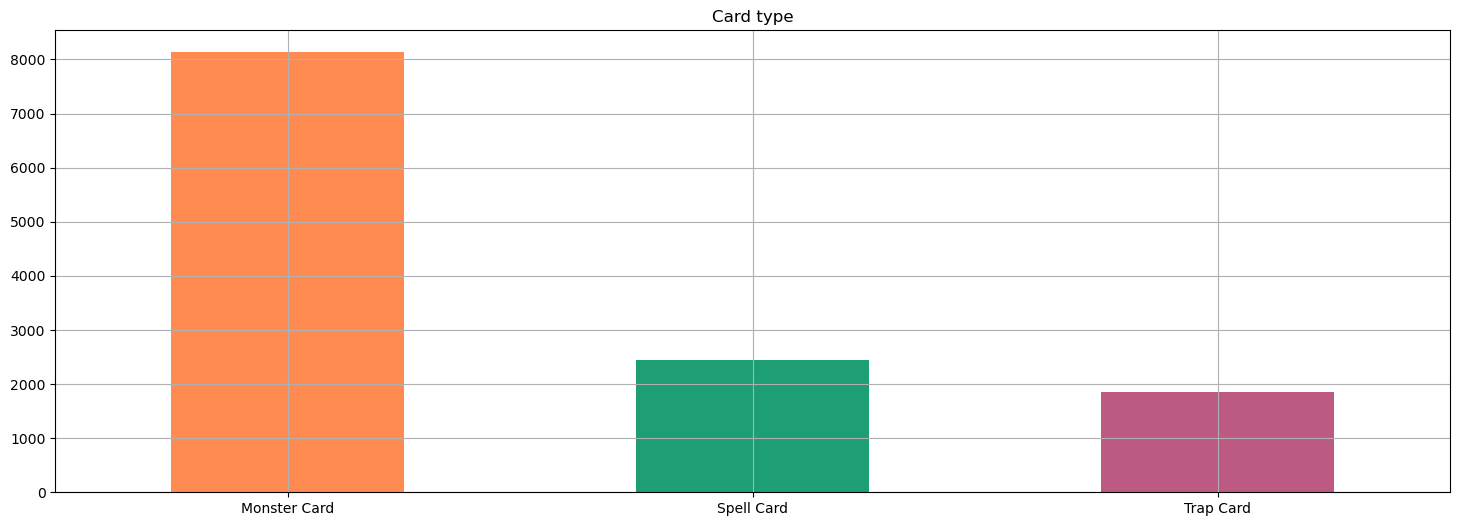

In [12]:
card_type_colors = [colors_dict[i] for i in full_df["Card type"].value_counts().index]
cards_df["Card type"].value_counts().plot.bar(
    figsize=(18, 6), grid=True, rot=0, color=card_type_colors, title="Card type"
)
plt.show()

## Monsters

### Attributes

In [13]:
print("Total number of attributes:", monster_df["Attribute"].nunique())

Total number of attributes:

7

In [14]:
monster_df.drop(columns=["Card type", "Page name", "Page URL"]).groupby(
    "Attribute"
).nunique()

Name  Password  Archseries  Primary type  Secondary type  \
Attribute                                                             
DARK       2260      2239         463             7               7   
DIVINE        6         0           3             1               0   
EARTH      1892      1883         338             7               6   
FIRE        703       690         197             7               7   
LIGHT      1647      1626         395             7               7   
WATER       844       843         211             7               6   
WIND        772       769         220             7               6   

           Monster type  Effect type  DEF  Pendulum Scale  Link  Link Arrows  \
Attribute                                                                      
DARK                 24          155   63              12     6           42   
DIVINE                2            6    4               0     0            0   
EARTH                23          127   60              12     4           29   
FIRE                 22           85   40               8     4           23   
LIGHT                24          134   50              11     5           30   
WATER                22           93   41               9     4           16   
WIND                 24          105   38              11     4           14   

           ATK  Level/Rank  TCG status  OCG status  Artwork  \
Attribute                                                     
DARK        71          13           6           6        3   
DIVINE       4           2           2           2        1   
EARTH       71          12           5           6        3   
FIRE        43          12           3           5        3   
LIGHT       58          14           4           6        3   
WATER       57          12           5           4        3   
WIND        47          12           5           5        3   

           Modification date  Errata  
Attribute                             
DARK                    2253       4  
DIVINE                     9       3  
EARTH                   1887       4  
FIRE                     703       4  
LIGHT                   1643       4  
WATER                    840       4  
WIND                     772       4

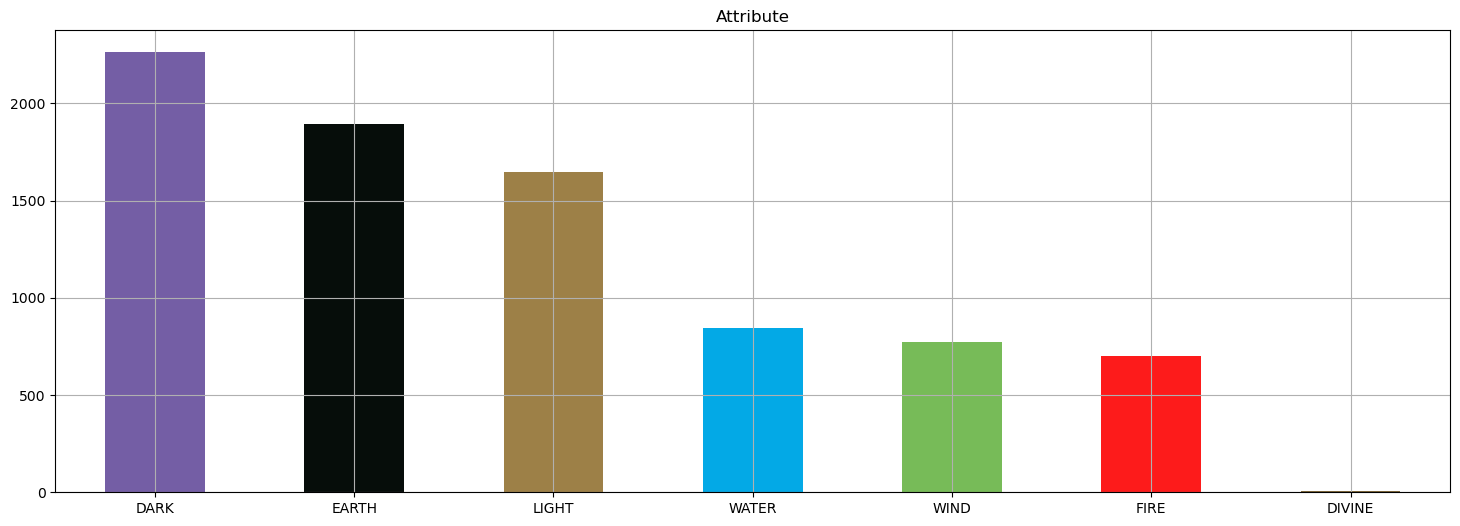

In [15]:
attribute_colors = [
    colors_dict[i] for i in monster_df["Attribute"].value_counts().index
]
monster_df["Attribute"].value_counts().plot.bar(
    figsize=(18, 6), grid=True, rot=0, color=attribute_colors, title="Attribute"
)
plt.show()

### Primary types

In [16]:
print("Total number of primary types:", monster_df["Primary type"].nunique())

Total number of primary types:

7

In [17]:
monster_df.drop(columns=["Card type", "Page name", "Page URL"]).groupby(
    "Primary type"
).nunique()

Name  Password  Archseries  Attribute  Secondary type  \
Primary type                                                             
Effect Monster   5528      5485         794          7               8   
Fusion Monster    448       443         146          6               1   
Link Monster      380       373         139          6               0   
Normal Monster    709       702         111          6               1   
Ritual Monster    127       127          38          6               3   
Synchro Monster   432       425         165          6               1   
Xyz Monster       504       495         196          6               0   

                 Monster type  Effect type  DEF  Pendulum Scale  Link  \
Primary type                                                            
Effect Monster             26          205   66              14     0   
Fusion Monster             24           69   46               4     0   
Link Monster               23           52    0               0     6   
Normal Monster             23            6   48              10     0   
Ritual Monster             15           33   26               1     0   
Synchro Monster            23           58   38               4     0   
Xyz Monster                23           70   42               5     0   

                 Link Arrows  ATK  Level/Rank  TCG status  OCG status  \
Primary type                                                            
Effect Monster             0   73          12           6           6   
Fusion Monster             0   50          12           4           5   
Link Monster              62   39           0           4           6   
Normal Monster             0   58           8           3           3   
Ritual Monster             0   35          12           1           1   
Synchro Monster            0   41          13           4           6   
Xyz Monster                0   51          14           6           6   

                 Artwork  Modification date  Errata  
Primary type                                         
Effect Monster         3               5479       4  
Fusion Monster         3                446       4  
Link Monster           3                379       3  
Normal Monster         3                710       4  
Ritual Monster         1                127       4  
Synchro Monster        2                432       4  
Xyz Monster            2                501       4

#### Has effect discrimination

In [18]:
effect = pd.crosstab(
    monster_df["Primary type"],
    pd.isna(monster_df["Effect type"]),
    rownames=["Primary type"],
    colnames=["Has effect"],
).rename(columns={True: "No Effect", False: "Effect"})
effect

Has effect       Effect  No Effect
Primary type                      
Effect Monster     5528          0
Fusion Monster      387         61
Link Monster        375          5
Normal Monster       34        676
Ritual Monster      112         15
Synchro Monster     429          3
Xyz Monster         502          2

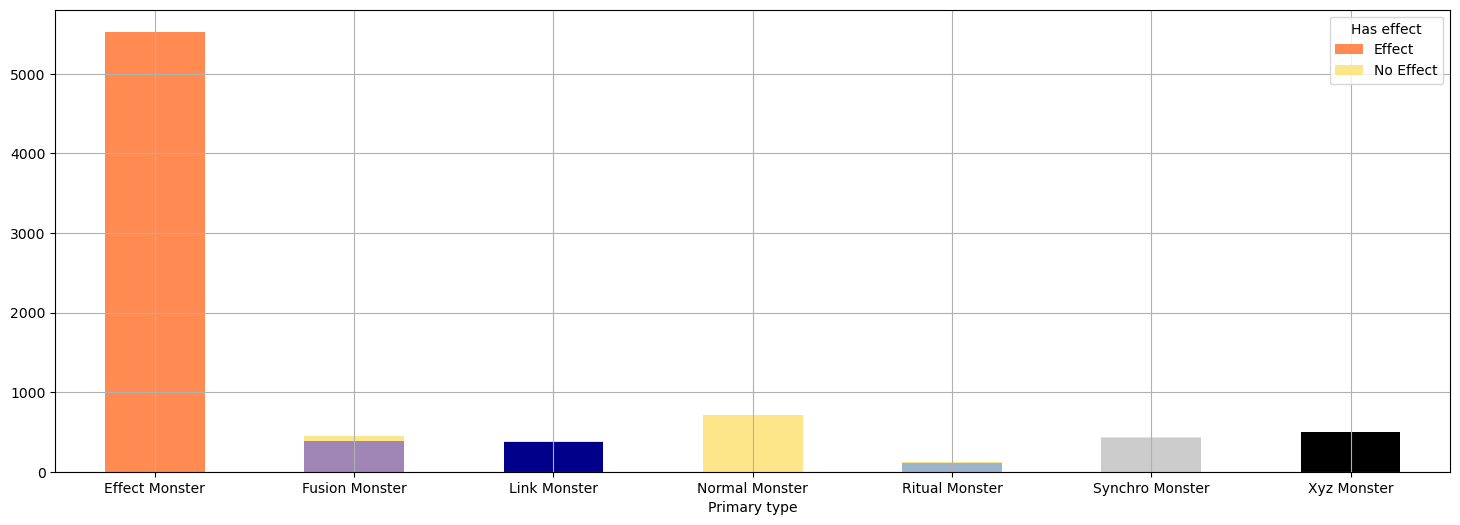

In [19]:
monster_type_colors = {
    "No Effect": colors_dict["Normal Monster"],
    "Effect": [colors_dict[i] for i in effect.index],
}
effect.plot.bar(
    figsize=(18, 6),
    stacked=True,
    grid=True,
    rot=0,
    legend=True,
    color=monster_type_colors,
)
# plt.yscale('log')
plt.show()

Obs: Normal monster can have effect if it is pendulum

#### Is pendulum discrimination

In [20]:
pendulum = pd.crosstab(
    monster_df["Primary type"],
    pd.isna(monster_df["Pendulum Scale"]),
    rownames=["Primary type"],
    colnames=["Is Pendulum"],
).rename(columns={True: "Not Pendulum", False: "Pendulum"})
pendulum

Is Pendulum      Pendulum  Not Pendulum
Primary type                           
Effect Monster        269          5259
Fusion Monster         10           438
Link Monster            0           380
Normal Monster         38           672
Ritual Monster          1           126
Synchro Monster         7           425
Xyz Monster             9           495

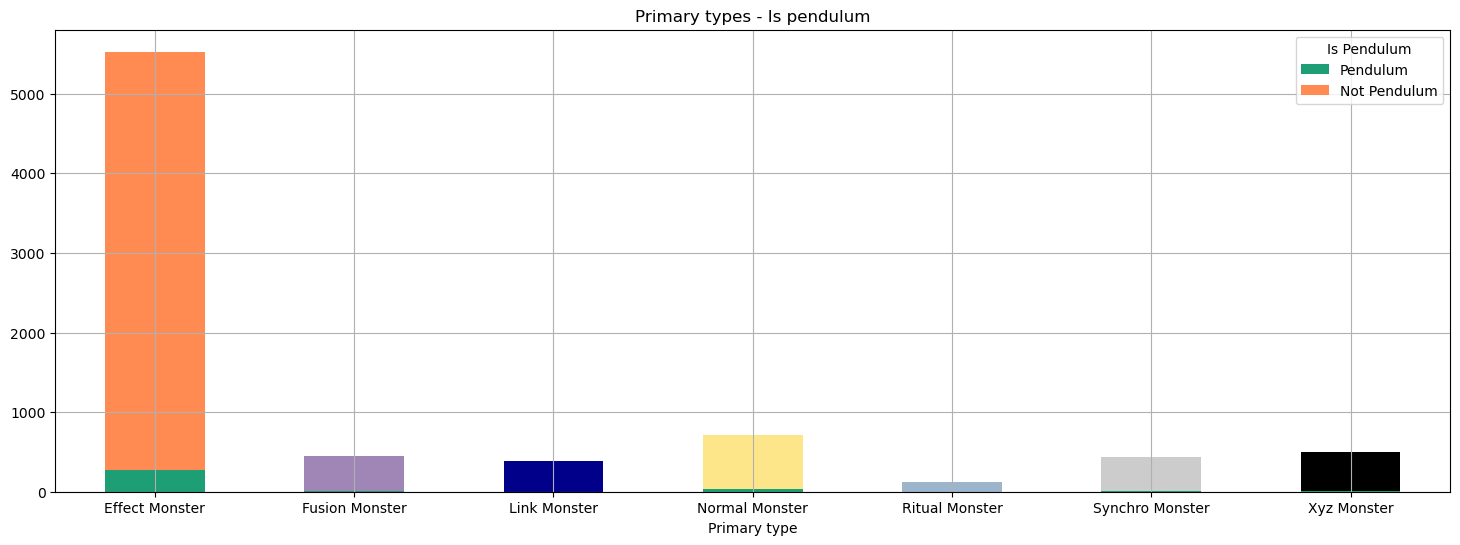

In [21]:
monster_type_colors_b = {
    "Pendulum": colors_dict["Pendulum Monster"],
    "Not Pendulum": [colors_dict[i] for i in pendulum.index],
}
pendulum.plot.bar(
    figsize=(18, 6),
    stacked=True,
    grid=True,
    rot=0,
    color=monster_type_colors_b,
    legend=True,
    title="Primary types - Is pendulum",
)
plt.show()

#### By attribute

In [22]:
primmary_crosstab = pd.crosstab(cards_df["Primary type"], cards_df["Attribute"])
primmary_crosstab

Attribute        DARK  DIVINE  EARTH  FIRE  LIGHT  WATER  WIND
Primary type                                                  
Effect Monster   1511       6   1322   481   1114    558   536
Fusion Monster    157       0     82    34    102     36    37
Link Monster      128       0     76    35     87     29    25
Normal Monster    173       0    243    51     73    106    64
Ritual Monster     42       0     17     7     35     20     6
Synchro Monster   114       0     71    53     82     38    74
Xyz Monster       138       0     83    42    154     57    30

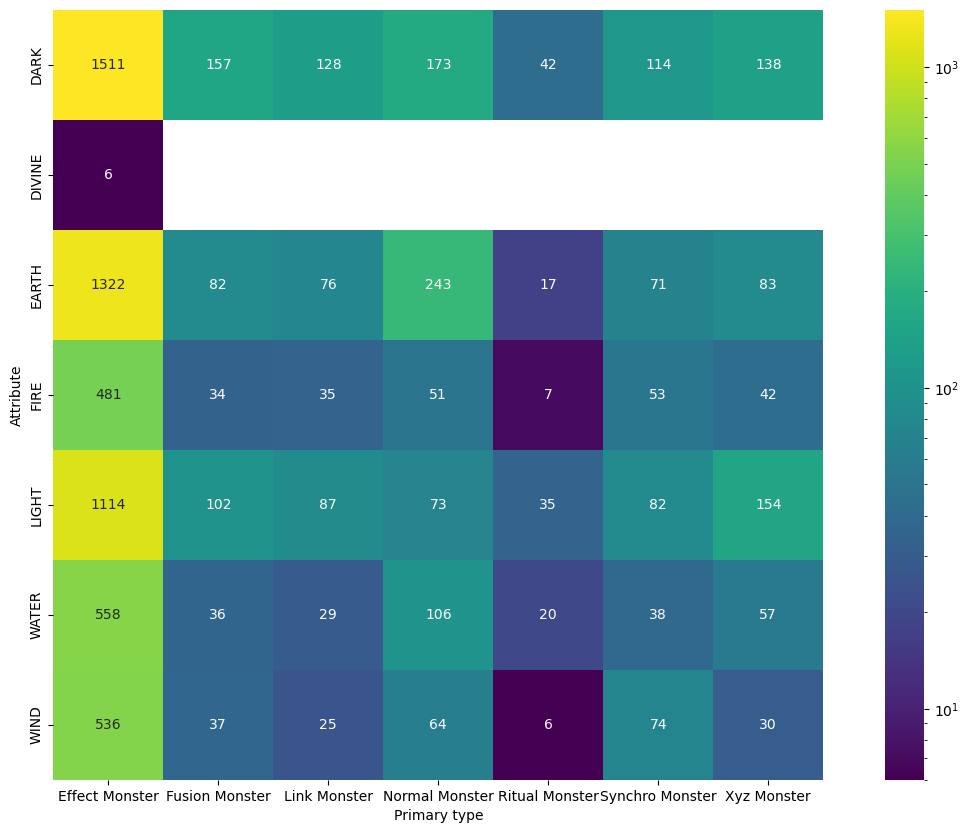

In [23]:
plt.figure(figsize=(16, 10))
sns.heatmap(
    primmary_crosstab.T,
    annot=True,
    fmt="g",
    cmap="viridis",
    square=True,
    norm=mc.LogNorm(),
)
plt.show()

### Secondary types

In [24]:
exploded_secondary_type = monster_df.explode("Secondary type")
print(
    "Total number of secondary types:",
    exploded_secondary_type["Secondary type"].nunique(),
)

Total number of secondary types:

6

In [25]:
exploded_secondary_type.drop(
    columns=["Card type", "Link", "Link Arrows", "Page name", "Page URL"]
).groupby("Secondary type").nunique()

Name  Password  Archseries  Attribute  Primary type  \
Secondary type                                                        
Flip monster     187       186          46          6             2   
Gemini monster    45        45          13          6             1   
Spirit monster    39        39           4          6             2   
Toon monster      17        17          13          6             1   
Tuner monster    499       493         142          6             5   
Union monster     37        37           9          6             1   

                Monster type  Effect type  DEF  Pendulum Scale  ATK  \
Secondary type                                                        
Flip monster              19           20   33               1   38   
Gemini monster            18            6   19               0   17   
Spirit monster            13            8   20               2   22   
Toon monster               7            8   15               0   12   
Tuner monster             23           62   32               7   32   
Union monster              9            6   14               0   17   

                Level/Rank  TCG status  OCG status  Artwork  \
Secondary type                                                
Flip monster            12           3           4        1   
Gemini monster           8           1           1        0   
Spirit monster          10           1           1        1   
Toon monster             5           1           2        1   
Tuner monster            9           3           5        3   
Union monster            8           1           1        1   

                Modification date  Errata  
Secondary type                             
Flip monster                  187       4  
Gemini monster                 45       4  
Spirit monster                 39       2  
Toon monster                   17       3  
Tuner monster                 498       4  
Union monster                  37       3

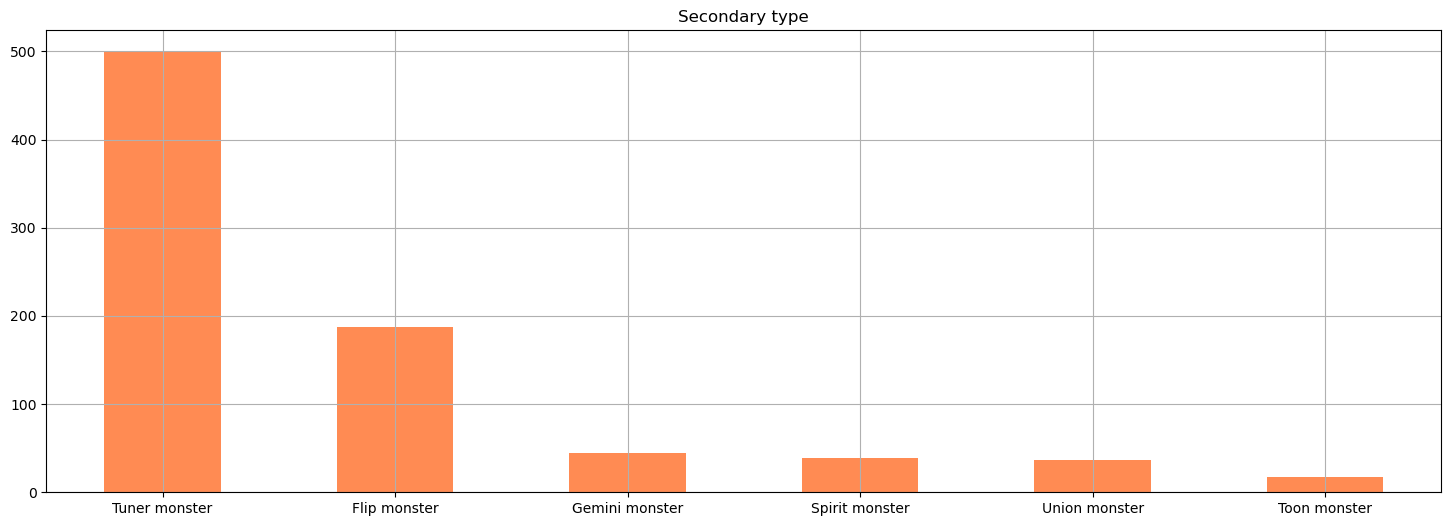

In [26]:
secondary_type_colors = colors_dict["Effect Monster"]
exploded_secondary_type["Secondary type"].value_counts().plot.bar(
    figsize=(18, 6),
    stacked=True,
    grid=True,
    rot=0,
    color=secondary_type_colors,
    legend=False,
    title="Secondary type",
)
plt.show()

#### By attribute

In [27]:
secondary_crosstab = pd.crosstab(
    exploded_secondary_type["Secondary type"], exploded_secondary_type["Attribute"]
)
secondary_crosstab

Attribute       DARK  EARTH  FIRE  LIGHT  WATER  WIND
Secondary type                                       
Flip monster      51     63    10     33     13    17
Gemini monster    11      8     8      6      8     4
Spirit monster     5      6     6      5      6    11
Toon monster       7      5     1      2      1     1
Tuner monster    129     94    51    102     53    70
Union monster      6      9     3     12      4     3

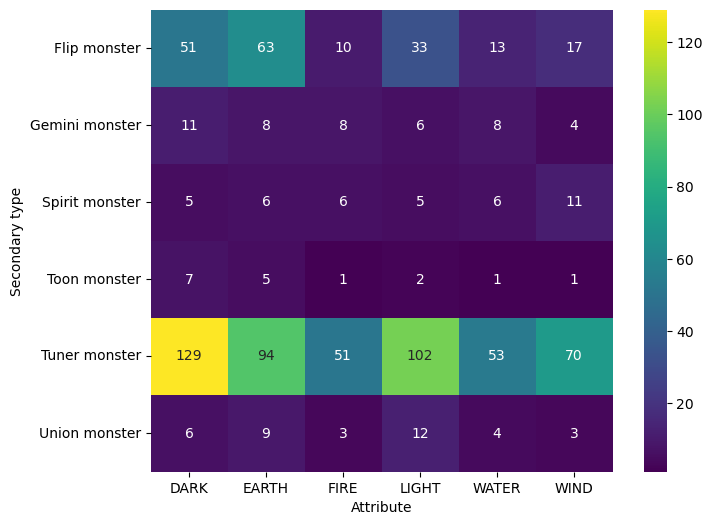

In [28]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    secondary_crosstab[secondary_crosstab > 0],
    annot=True,
    fmt="g",
    cmap="viridis",
    square=True,
)
plt.show()

#### By secondary type

In [29]:
secondary_crosstab_b = pd.crosstab(
    exploded_secondary_type["Primary type"],
    exploded_secondary_type["Secondary type"],
    margins=True,
)
secondary_crosstab_b

Secondary type   Flip monster  Gemini monster  Spirit monster  Toon monster  \
Primary type                                                                  
Effect Monster            186              45              37            17   
Fusion Monster              0               0               0             0   
Normal Monster              0               0               0             0   
Ritual Monster              1               0               2             0   
Synchro Monster             0               0               0             0   
All                       187              45              39            17   

Secondary type   Tuner monster  Union monster  All  
Primary type                                        
Effect Monster             450             37  772  
Fusion Monster               3              0    3  
Normal Monster              12              0   12  
Ritual Monster               2              0    5  
Synchro Monster             32              0   32  
All                        499             37  824

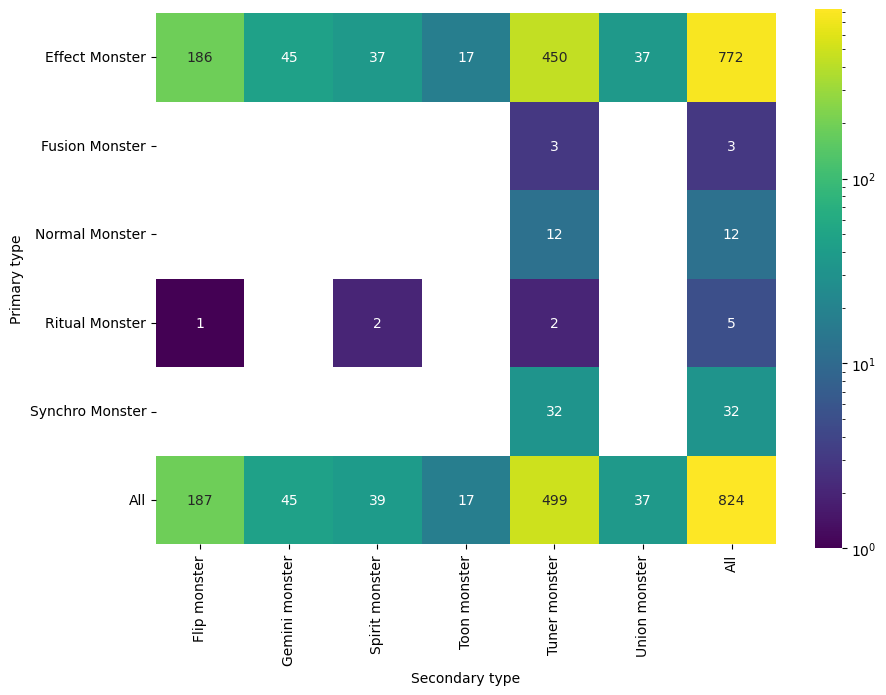

In [30]:
plt.figure(figsize=(10, 7))
sns.heatmap(
    secondary_crosstab_b,
    annot=True,
    fmt="g",
    cmap="viridis",
    square=True,
    norm=mc.LogNorm(),
)
plt.show()

### Monster types

In [31]:
print("Total number of monster types:", monster_df["Monster type"].nunique())

Total number of monster types:

26

In [32]:
monster_df.drop(columns=["Card type", "Page name", "Page URL"]).groupby(
    "Monster type"
).nunique()

Name  Password  Archseries  Attribute  Primary type  \
Monster type                                                         
Aqua            256       256          67          6             7   
Beast           380       377          86          6             7   
Beast-Warrior   243       239          49          6             7   
Creator God       1         0           1          1             1   
Cyberse         260       256          35          6             7   
Dinosaur        133       130          26          6             6   
Divine-Beast      5         0           2          1             1   
Dragon          667       663         188          6             7   
Fairy           520       515         116          6             7   
Fiend           777       764         152          6             7   
Fish            128       128          21          5             7   
Illusion          4         4           1          3             2   
Insect          253       253          40          6             7   
Machine         934       929         170          6             7   
Plant           236       234          39          6             6   
Psychic         181       180          44          6             6   
Pyro            128       125          38          5             6   
Reptile         172       172          35          6             6   
Rock            250       247          75          6             7   
Sea Serpent      83        83          28          6             6   
Spellcaster     686       679         151          6             7   
Thunder         130       129          35          6             6   
Warrior        1051      1043         226          6             7   
Winged Beast    315       313          66          6             7   
Wyrm             88        88          20          6             6   
Zombie          243       243          36          6             7   

               Secondary type  Effect type  DEF  Pendulum Scale  Link  \
Monster type                                                            
Aqua                        6           51   34               3     2   
Beast                       4           61   38               7     2   
Beast-Warrior               3           58   31               6     3   
Creator God                 0            1    1               0     0   
Cyberse                     1           45   29               1     6   
Dinosaur                    1           36   32               4     2   
Divine-Beast                0            5    4               0     0   
Dragon                      6          108   48               9     5   
Fairy                       5           83   38               9     4   
Fiend                       6          107   45              12     5   
Fish                        2           31   28               1     1   
Illusion                    0            4    4               0     0   
Insect                      3           59   33               2     3   
Machine                     7          114   55               9     4   
Plant                       4           38   30               5     4   
Psychic                     2           43   31               5     2   
Pyro                        5           38   31               0     1   
Reptile                     3           46   30               3     2   
Rock                        4           60   40               4     3   
Sea Serpent                 3           32   26               1     2   
Spellcaster                 6          100   42              11     5   
Thunder                     4           39   29               1     2   
Warrior                     6           92   41               7     4   
Winged Beast                5           61   29               4     4   
Wyrm                        1           33   24               3     4   
Zombie                      6           52   37               2     3   

         

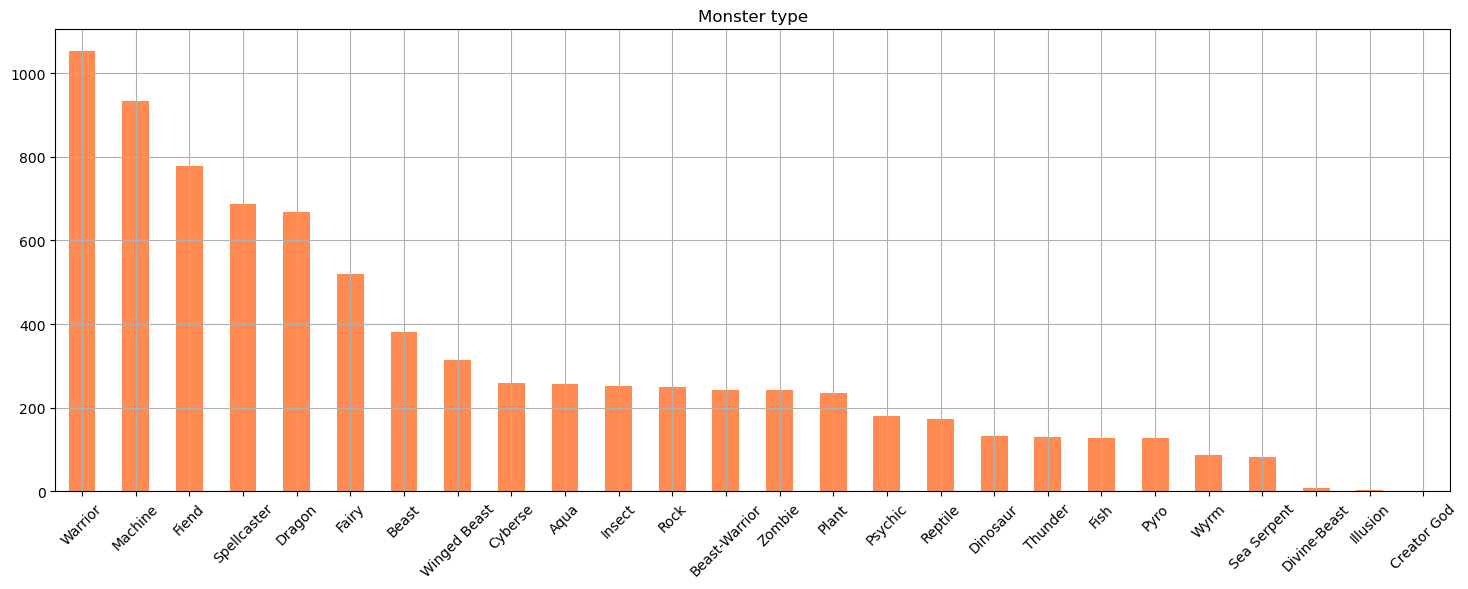

In [33]:
monster_type_colors = colors_dict["Monster Card"]
monster_df["Monster type"].value_counts().plot.bar(
    figsize=(18, 6), grid=True, rot=45, color=monster_type_colors, title="Monster type"
)
plt.show()

#### By Attribute

In [34]:
monster_crosstab = pd.crosstab(cards_df["Monster type"], cards_df["Attribute"])
monster_crosstab

Attribute      DARK  DIVINE  EARTH  FIRE  LIGHT  WATER  WIND
Monster type                                                
Aqua              9       0      6    10      4    221     6
Beast            38       0    212    16     74     14    27
Beast-Warrior    40       0     84    54     34     16    15
Creator God       0       1      0     0      0      0     0
Cyberse          73       0     36    48     62     28    13
Dinosaur         12       0     63    36      5      9     8
Divine-Beast      0       8      0     0      0      0     0
Dragon          257       0     48    50    171     28   113
Fairy            59       0     63    18    328     27    25
Fiend           585       0     34    48     71     25    16
Fish              2       0      2     0      1    121     2
Illusion          2       0      0     0      1      0     1
Insect           41       0    134     6     21      4    47
Machine         230       0    317    53    169     50   115
Plant            43       0    123    11     22     24    13
Psychic          23       0     38    17     47     13    43
Pyro              3       0      6   112      4      0     3
Reptile          38       0     34    16     45     35     4
Rock             17       0    202     5     14      5     7
Sea Serpent       3       0      1     1      2     72     4
Spellcaster     282       0     53    30    196     63    63
Thunder          14       0     10     5     78      4    19
Warrior         205       0    364   113    253     53    64
Winged Beast    112       0      7    17     15     12   152
Wyrm             15       0     19    11     23     12     8
Zombie          160       0     38    26      7      8     4

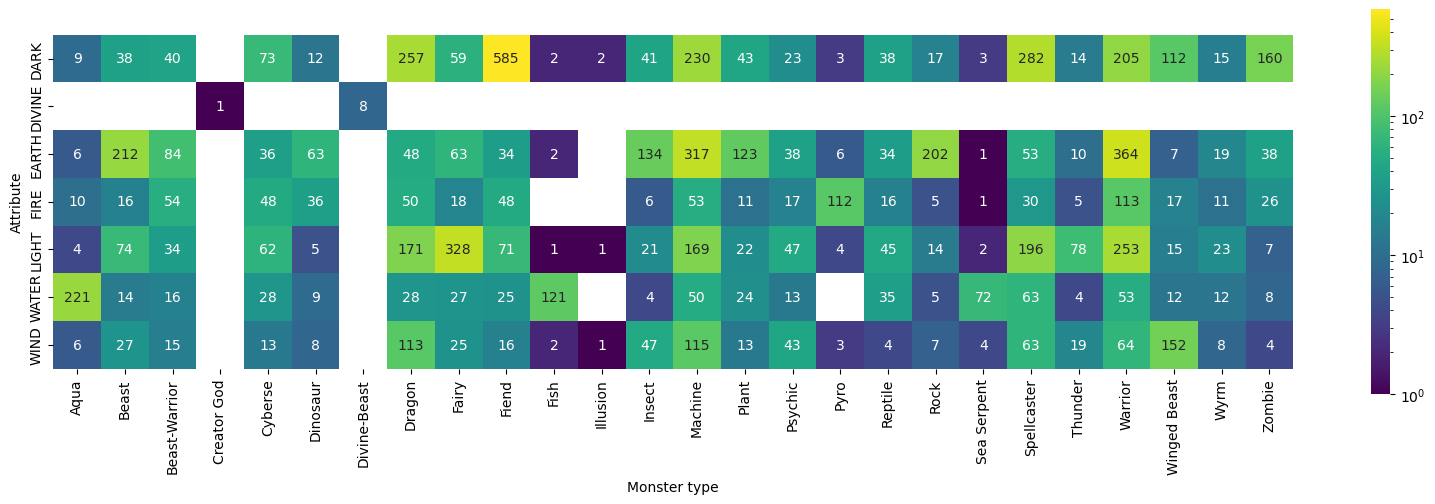

In [35]:
plt.figure(figsize=(20, 5))
sns.heatmap(
    monster_crosstab[monster_crosstab > 0].T,
    annot=True,
    fmt="g",
    cmap="viridis",
    square=True,
    norm=mc.LogNorm(),
)
plt.show()

#### By primary type

In [36]:
monster_crosstab_b = pd.crosstab(
    cards_df["Monster type"], cards_df["Primary type"], dropna=False
)
monster_crosstab_b

Primary type   Effect Monster  Fusion Monster  Link Monster  Normal Monster  \
Monster type                                                                  
Aqua                      154              12             3              57   
Beast                     277              19             9              50   
Beast-Warrior             166              11             9              21   
Creator God                 1               0             0               0   
Cyberse                   128               5            99               5   
Dinosaur                   93               9             3              18   
Divine-Beast                5               0             0               0   
Dragon                    350              64            33              45   
Fairy                     372              22            25              32   
Fiend                     547              50            29              72   
Fish                       92               5             1              17   
Illusion                    3               1             0               0   
Insect                    187               4            10              29   
Machine                   652              48            39              61   
Plant                     165               6            15              24   
Psychic                   124              11             5               9   
Pyro                       90               8             2              18   
Reptile                   141               2             3              18   
Rock                      172              18             5              27   
Sea Serpent                56               2             2               8   
Spellcaster               517              27            27              54   
Thunder                    98               9             5              10   
Warrior                   689              97            30              78   
Winged Beast              229               9            10              26   
Wyrm                       55               2             9               3   
Zombie                    165               7             7              28   

Primary type   Ritual Monster  Synchro Monster  Xyz Monster  
Monster type                                                 
Aqua                        8                4           18  
Beast                       1               14           11  
Beast-Warrior               5                8           23  
Creator God                 0                0            0  
Cyberse                     7                6           10  
Dinosaur                    0                5            5  
Divine-Beast                0                0            0  
Dragon                     15               98           62  
Fairy                      18               18           33  
Fiend                      15               26           40  
Fish                        1                9            3  
Illusion                    0                0            0  
Insect                      1                8           14  
Machine                     4               65           65  
Plant                       0                8           18  
Psychic                     0               19           13  
Pyro                        0                6            4  
Reptile                     0                5            3  
Rock                        7                5           16  
Sea Serpent                 0                5           10  
Spellcaster                18               17           27  
Thunder                     0                6            2  
Warrior                    17               57           84  
Winged Beast                4               15           22  
Wyrm                        0               10            9  
Zombie                      6               18           12

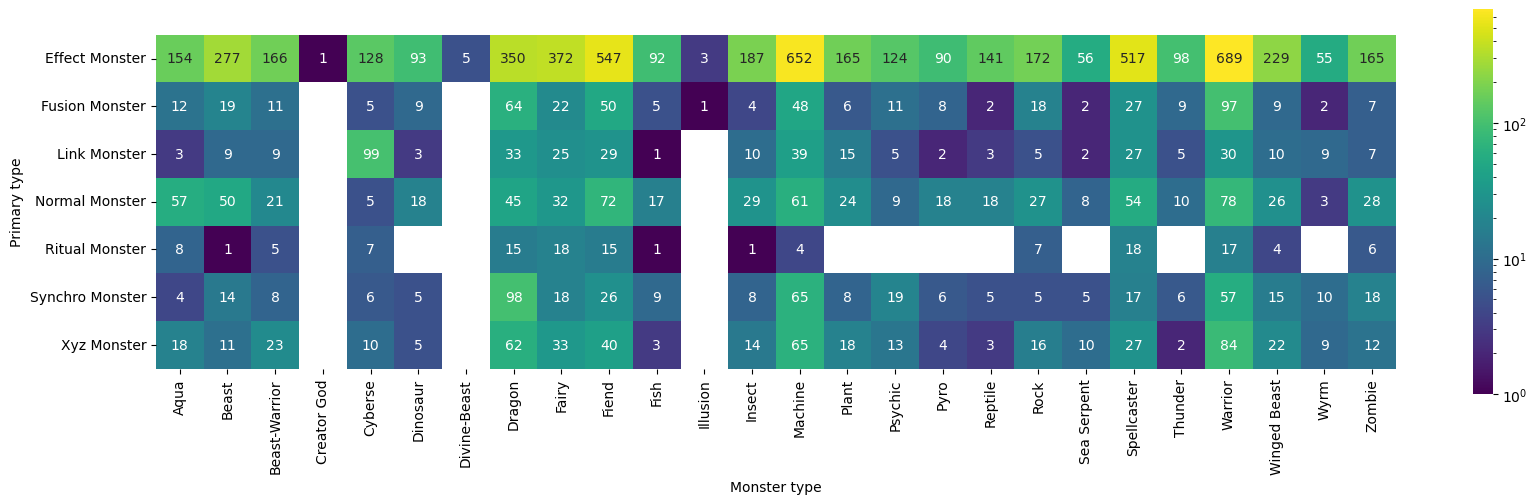

In [37]:
plt.figure(figsize=(20, 5))
sns.heatmap(
    monster_crosstab_b[monster_crosstab_b > 0].T,
    annot=True,
    fmt="g",
    cmap="viridis",
    square=True,
    norm=mc.LogNorm(),
)
plt.show()

#### By secondary type

In [38]:
monster_crosstab_c = pd.crosstab(
    exploded_secondary_type["Monster type"],
    exploded_secondary_type["Secondary type"],
    dropna=False,
)
monster_crosstab_c

Secondary type  Flip monster  Gemini monster  Spirit monster  Toon monster  \
Monster type                                                                 
Aqua                       4               4               1             1   
Beast                     15               1               2             0   
Beast-Warrior              1               0               1             0   
Cyberse                    0               0               0             0   
Dinosaur                   0               0               0             0   
Dragon                     1               6               1             3   
Fairy                      8               2               8             0   
Fiend                     27               4               2             1   
Fish                       0               1               0             0   
Insect                    20               2               0             0   
Machine                   10               1               0             4   
Plant                      4               1               0             0   
Psychic                    3               0               0             0   
Pyro                       4               2               2             0   
Reptile                   18               1               0             0   
Rock                      12               1               2             0   
Sea Serpent                1               1               0             0   
Spellcaster               35               3               4             4   
Thunder                    3               1               1             0   
Warrior                   12               9               6             3   
Winged Beast               5               2               7             1   
Wyrm                       0               0               0             0   
Zombie                     4               3               2             0   

Secondary type  Tuner monster  Union monster  
Monster type                                  
Aqua                       11              3  
Beast                      22              0  
Beast-Warrior               9              0  
Cyberse                     9              0  
Dinosaur                    8              0  
Dragon                     45              4  
Fairy                      23              5  
Fiend                      45              1  
Fish                        8              0  
Insect                     12              0  
Machine                    87             18  
Plant                      20              1  
Psychic                    24              0  
Pyro                        9              1  
Reptile                     7              0  
Rock                        3              0  
Sea Serpent                 9              0  
Spellcaster                42              0  
Thunder                     8              0  
Warrior                    34              3  
Winged Beast               31              0  
Wyrm                       10              0  
Zombie                     23              1

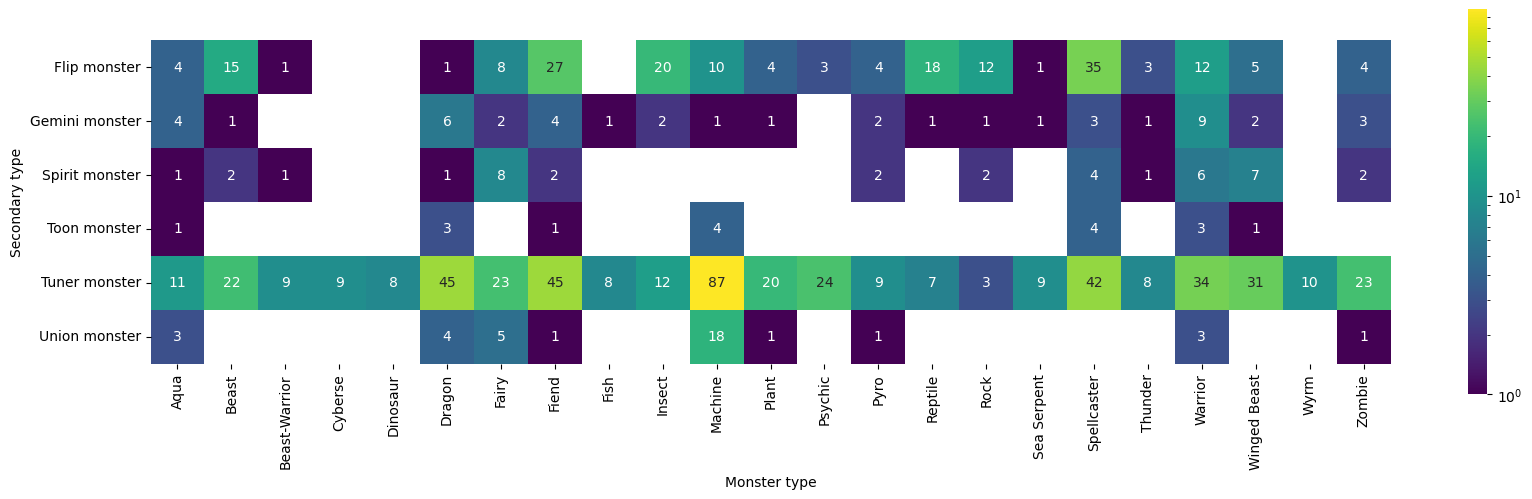

In [39]:
plt.figure(figsize=(20, 5))
sns.heatmap(
    monster_crosstab_c[monster_crosstab_c > 0].T,
    annot=True,
    fmt="g",
    cmap="viridis",
    square=True,
    norm=mc.LogNorm(),
)
plt.show()

### Effect type

In [40]:
print("Total number of effect types:", monster_df["Effect type"].explode().nunique())

Total number of effect types:

14

In [41]:
monster_df[monster_df["Effect type"].notna()].drop(
    columns=["Card type", "Page name", "Page URL"]
).explode("Effect type").groupby("Effect type").nunique()

Name  Password  Archseries  Attribute  Primary type  \
Effect type                                                                   
Activation condition       1         1           1          1             1   
Condition               3216      3157         663          7             7   
Continuous Effect       2193      2180         567          7             6   
Continuous-like Effect   237       237          72          6             6   
Flip effect              171       170          44          6             1   
Ignition Effect         2669      2653         653          7             6   
Ignition-like Effect     226       220          77          6             6   
Lingering effect          19        19          12          6             3   
Maintenance cost          44        44           8          6             3   
Quick Effect            1070      1064         405          6             6   
Quick-like Effect          4         4           1          1             1   
Summoning condition      942       905         322          7             6   
Trigger Effect          4431      4400         790          7             7   
Unclassified effect      831       822         282          7             6   

                        Secondary type  Monster type  DEF  Pendulum Scale  \
Effect type                                                                 
Activation condition                 0             1    1               1   
Condition                            7            26   64              13   
Continuous Effect                    5            25   52              12   
Continuous-like Effect               4            21   36              13   
Flip effect                          2            19   33               1   
Ignition Effect                      7            25   61              12   
Ignition-like Effect                 3            20   33              13   
Lingering effect                     2            14   13               0   
Maintenance cost                     0            12   18               2   
Quick Effect                         5            24   49               9   
Quick-like Effect                    0             1    2               0   
Summoning condition                  4            25   52               9   
Trigger Effect                       7            25   63              14   
Unclassified effect                  5            26   45               9   

                        Link  Link Arrows  ATK  Level/Rank  TCG status  \
Effect type                                                              
Activation condition       0            0    1           1           1   
Condition                  6           54   64          14           5   
Continuous Effect          6           48   59          14           5   
Continuous-like Effect     1            2   42          11           3   
Flip effect                0            0   38          12           3   
Ignition Effect            5           42   66          13           5   
Ignition-like Effect       1            1   35          12           4   
Lingering effect           2            2   13           8           2   
Maintenance cost           1            1   21           8           1   
Quick Effect               6           29   51          13           3   
Quick-like Effect          0            0    3           1           1   
Summoning condition        5            7   53          13           4   
Trigger Effect             6           51   67          14           5   
Unclassified effect        5           12   49          13           4   

                        OCG status  Artwork  Modification date  Errata  
Effect type                                                             
Activation condition             1        0                  1       1  
Condition                        6        3               3192       4  
Continuous Effect                4        3      

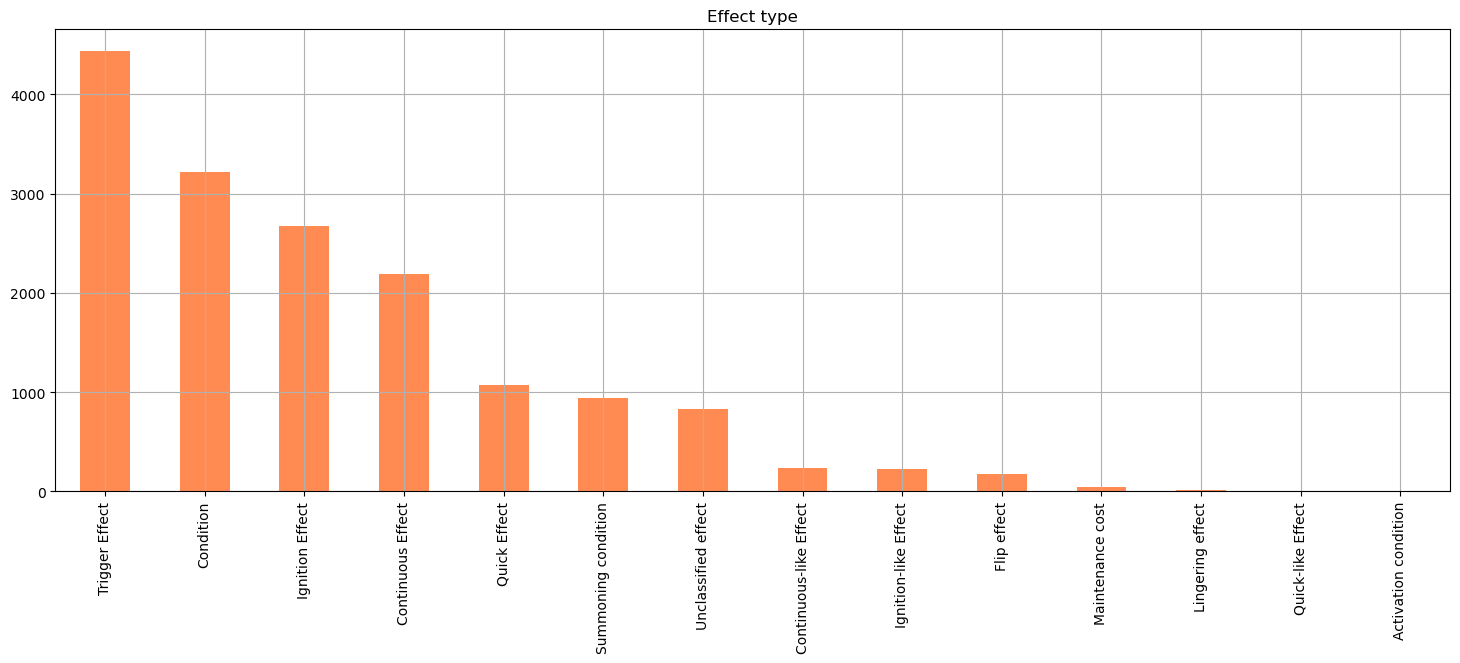

In [42]:
monster_effect_colors = colors_dict["Effect Monster"]
monster_df["Effect type"].explode("Effect type").value_counts().plot.bar(
    figsize=(18, 6), grid=True, color=monster_effect_colors, title="Effect type"
)
# plt.yscale('log')
plt.show()

### ATK

In [43]:
print("Total number of ATK values:", monster_df["ATK"].nunique())

Total number of ATK values:

83

In [44]:
monster_df.drop(columns=["Card type", "Page name", "Page URL"]).groupby(
    "ATK"
).nunique().sort_index(key=lambda x: pd.to_numeric(x, errors="coerce"))

Name  Password  Archseries  Attribute  Primary type  Secondary type  \
ATK                                                                         
0      608       605         232          6             7               7   
50       2         2           2          2             1               0   
100    220       220         108          6             5               3   
150      1         1           0          1             1               0   
200    122       122          69          6             6               5   
...    ...       ...         ...        ...           ...             ...   
4600     2         2           1          2             1               0   
5000     9         9           6          3             5               0   
?       80        75          37          7             5               1   
????     1         0           1          1             0               0   
X000     1         0           1          1             0               0   

      Monster type  Effect type  DEF  Pendulum Scale  Link  Link Arrows  \
ATK                                                                       
0               23           94   35               9     5           15   
50               2            2    2               0     0            0   
100             20           48   27               9     2            2   
150              1            0    1               0     0            0   
200             20           36   22               5     1            2   
...            ...          ...  ...             ...   ...          ...   
4600             1            2    1               0     0            0   
5000             4            8    4               0     1            1   
?               20           35    8               2     1            1   
????             1            0    1               0     0            0   
X000             1            0    1               0     0            0   

      Level/Rank  TCG status  OCG status  Artwork  Modification date  Errata  
ATK                                                                           
0             13           5           5        3                607       4  
50             1           1           1        0                  2       0  
100           11           3           3        2                220       4  
150            1           1           1        0                  1       0  
200            7           2           2        1                122       4  
...          ...         ...         ...      ...                ...     ...  
4600           1           1           1        1                  2       1  
5000           2           1           1        1                  9       2  
?             13           2           3        3                 79       4  
????           1           1           1        0                  1       1  
X000           1           1           1        0                  1       1  

[83 rows x 18 columns]

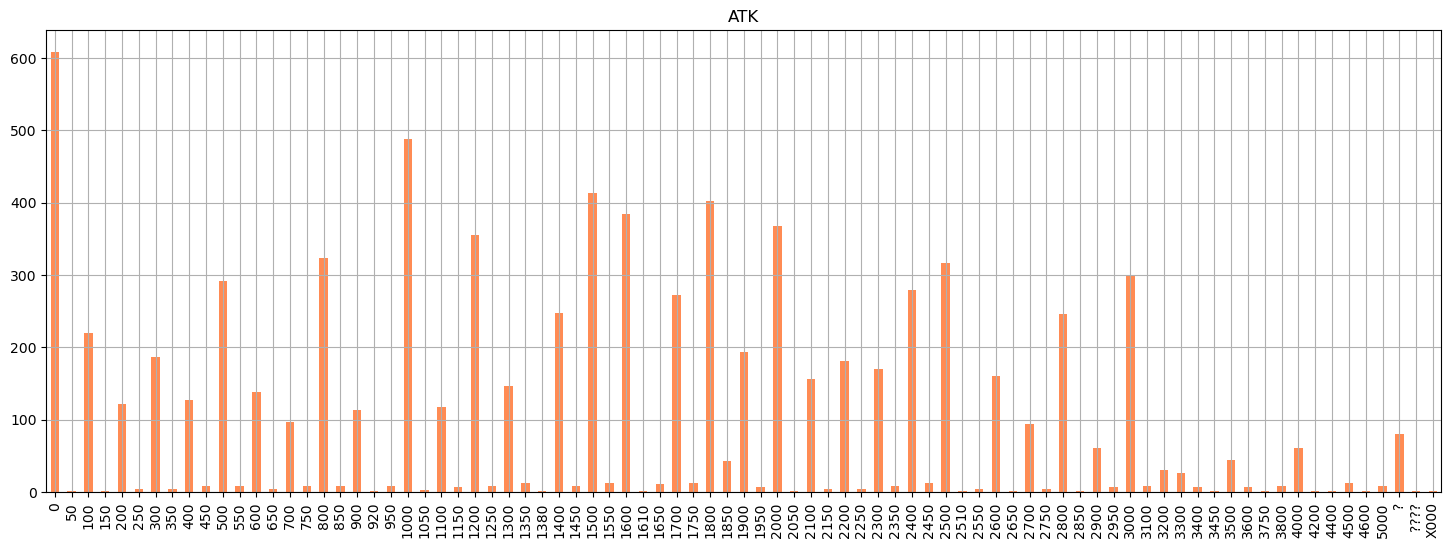

In [45]:
atk_colors = colors_dict["Monster Card"]
monster_df["ATK"].value_counts().sort_index(
    key=lambda x: pd.to_numeric(x, errors="coerce")
).plot.bar(figsize=(18, 6), grid=True, color=atk_colors, title="ATK")
plt.show()

### DEF

In [46]:
print("Total number of DEF values:", monster_df["DEF"].nunique())

Total number of DEF values:

78

In [47]:
monster_df.drop(columns=["Card type", "Page name", "Page URL"]).groupby(
    "DEF"
).nunique().sort_index(key=lambda x: pd.to_numeric(x, errors="coerce"))

Name  Password  Archseries  Attribute  Primary type  Secondary type  \
DEF                                                                         
0      764       761         258          6             6               8   
50       1         1           1          1             1               0   
100    212       212          96          6             5               4   
200    254       252         110          6             5               5   
250      8         8           3          4             2               1   
...    ...       ...         ...        ...           ...             ...   
4800     1         1           1          1             1               0   
5000     5         5           3          3             2               0   
?       54        49          26          7             4               1   
????     1         0           1          1             0               0   
X000     1         0           1          1             0               0   

      Monster type  Effect type  Pendulum Scale  Link  Link Arrows  ATK  \
DEF                                                                       
0               23          104              10     0            0   45   
50               1            1               0     0            0    1   
100             19           47               9     0            0   24   
200             23           48               5     0            0   31   
250              5            5               0     0            0    4   
...            ...          ...             ...   ...          ...  ...   
4800             1            1               0     0            0    1   
5000             3            4               0     0            0    2   
?               17           26               1     0            0    2   
????             1            0               0     0            0    1   
X000             1            0               0     0            0    1   

      Level/Rank  TCG status  OCG status  Artwork  Modification date  Errata  
DEF                                                                           
0             13           5           4        2                761       4  
50             1           1           1        0                  1       0  
100           10           2           2        2                212       4  
200           10           2           4        2                254       4  
250            2           1           1        0                  8       2  
...          ...         ...         ...      ...                ...     ...  
4800           1           1           1        0                  1       0  
5000           2           1           1        1                  5       2  
?             13           2           3        2                 53       4  
????           1           1           1        0                  1       1  
X000           1           1           1        0                  1       1  

[78 rows x 18 columns]

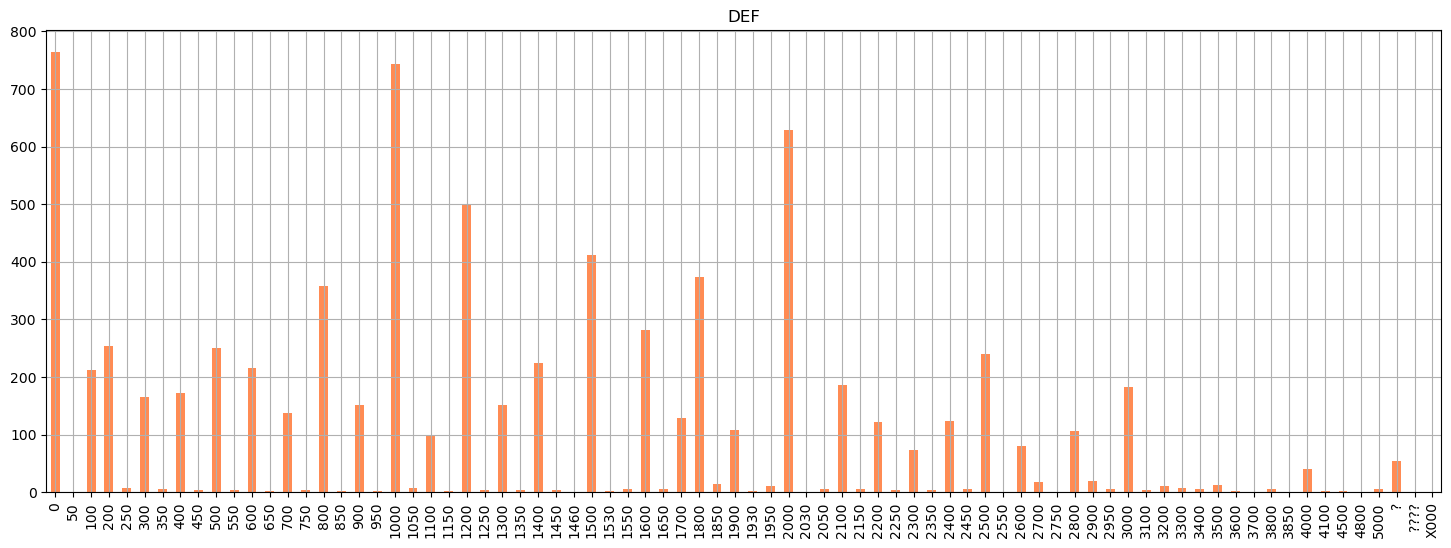

In [48]:
def_colors = colors_dict["Monster Card"]
monster_df["DEF"].value_counts().sort_index(
    key=lambda x: pd.to_numeric(x, errors="coerce")
).plot.bar(figsize=(18, 6), grid=True, color=def_colors, title="DEF")
plt.show()

### Level/Rank

In [49]:
monster_df.drop(
    columns=["Card type", "Link", "Link Arrows", "Page name", "Page URL"]
).groupby("Level/Rank").nunique().sort_index(
    key=lambda x: pd.to_numeric(x, errors="coerce")
)

Name  Password  Archseries  Attribute  Primary type  \
Level/Rank                                                        
0              6         6           3          2             2   
1            618       615         227          6             6   
2            681       679         213          6             6   
3           1162      1154         298          6             6   
4           2368      2362         518          6             6   
5            611       608         248          6             6   
6            625       618         241          6             6   
7            475       470         228          6             6   
8            696       678         306          6             6   
9            152       151          89          6             5   
10           257       245         152          7             5   
11            31        31          23          6             5   
12            61        59          43          7             5   
13             1         1           1          1             1   

            Secondary type  Monster type  Effect type  DEF  Pendulum Scale  \
Level/Rank                                                                   
0                        0             2            5    3               0   
1                        7            23           81   30              11   
2                        6            23           77   30               7   
3                        6            23           96   37               9   
4                        6            24          135   47               9   
5                        6            23           85   39               8   
6                        6            23           92   38               9   
7                        6            24          102   35               9   
8                        5            24          110   41               8   
9                        2            21           56   27               1   
10                       2            22           78   34               6   
11                       3            13           22   16               1   
12                       1            13           34   19               3   
13                       0             1            1    1               0   

            ATK  TCG status  OCG status  Artwork  Modification date  Errata  
Level/Rank                                                                   
0             3           2           2        0                  6       1  
1            22           4           4        2                617       4  
2            29           3           5        1                680       4  
3            41           3           6        3               1162       4  
4            54           4           6        3               2360       4  
5            46           4           4        2                611       4  
6            38           5           6        3                626       4  
7            38           4           6        2                477       4  
8            42           5           5        3                696       4  
9            33           4           3        1                152       4  
10           33           3           4        3                260       4  
11           15           2           1        1                 31       2  
12           14           1           3        1                 61       3  
13            1           1           1        0                  1       0

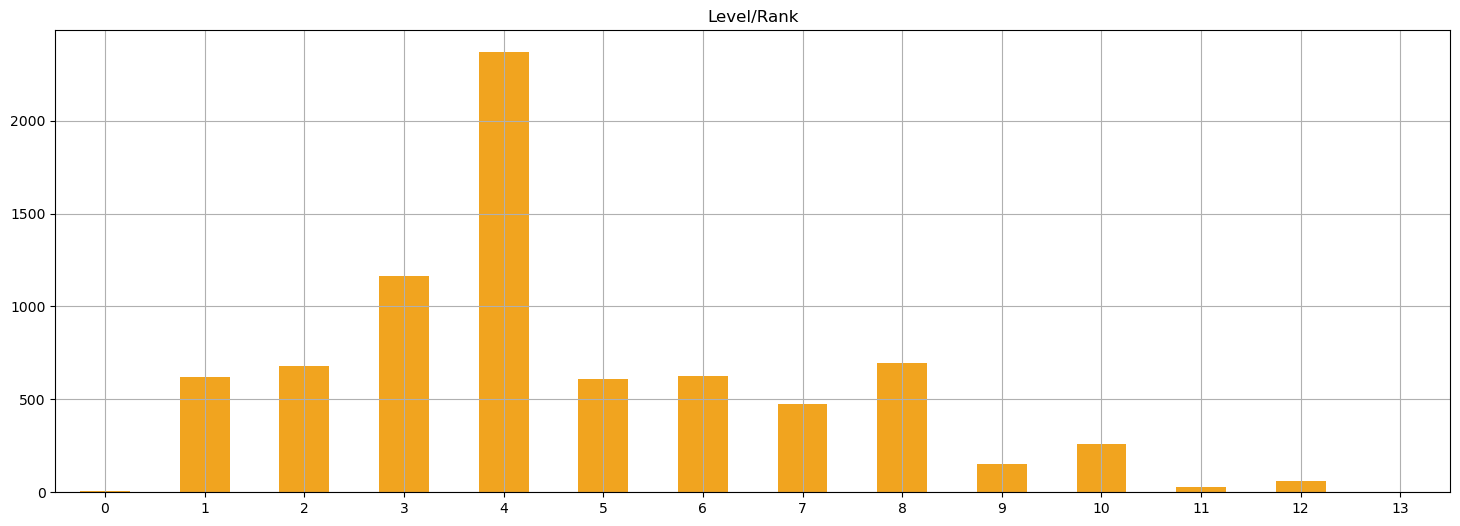

In [50]:
stars_colors = colors_dict["Level"]
monster_df["Level/Rank"].value_counts().sort_index(
    key=lambda x: pd.to_numeric(x, errors="coerce")
).plot.bar(figsize=(18, 6), grid=True, rot=0, color=stars_colors, title="Level/Rank")
plt.show()

#### ATK statistics

In [51]:
monster_df[["Level/Rank", "ATK"]].apply(pd.to_numeric, errors="coerce").dropna().astype(
    int
).groupby("Level/Rank").describe()

ATK                                                         \
             count         mean          std  min     25%     50%     75%   
Level/Rank                                                                  
0              5.0   600.000000  1341.640786  0.0     0.0     0.0     0.0   
1            609.0   244.909688   352.106490  0.0     0.0   100.0   300.0   
2            679.0   581.664212   407.686507  0.0   300.0   500.0   800.0   
3           1159.0   956.816221   485.885542  0.0   600.0  1000.0  1300.0   
4           2356.0  1418.900679   541.171511  0.0  1200.0  1500.0  1800.0   
5            608.0  1759.572368   640.489528  0.0  1500.0  1900.0  2200.0   
6            622.0  2014.871383   612.286888  0.0  1900.0  2200.0  2400.0   
7            472.0  2286.970339   616.230179  0.0  2200.0  2500.0  2600.0   
8            688.0  2551.235465   699.122396  0.0  2500.0  2800.0  3000.0   
9            149.0  2582.885906   850.730446  0.0  2500.0  2800.0  3000.0   
10           237.0  2811.603376  1206.954759  0.0  2800.0  3000.0  3500.0   
11            31.0  2990.322581  1074.741779  0.0  3000.0  3300.0  3500.0   
12            56.0  3290.178571  1380.494629  0.0  3000.0  3800.0  4000.0   

                    
               max  
Level/Rank          
0           3000.0  
1           2500.0  
2           2400.0  
3           3000.0  
4           3000.0  
5           4000.0  
6           4000.0  
7           3300.0  
8           4500.0  
9           4500.0  
10          5000.0  
11          4000.0  
12          5000.0

#### DEF statistics

In [52]:
monster_df[["Level/Rank", "DEF"]].apply(pd.to_numeric, errors="coerce").dropna().astype(
    int
).groupby("Level/Rank").describe()

DEF                                                         \
             count         mean          std  min     25%     50%     75%   
Level/Rank                                                                  
0              5.0   400.000000   894.427191  0.0     0.0     0.0     0.0   
1            611.0   350.736498   530.267746  0.0     0.0   100.0   400.0   
2            680.0   673.014706   562.863131  0.0   200.0   525.0   900.0   
3           1159.0   957.679034   575.388775  0.0   600.0   900.0  1300.0   
4           2358.0  1168.799830   609.828809  0.0   800.0  1200.0  1600.0   
5            609.0  1430.131363   674.293477  0.0  1000.0  1500.0  1900.0   
6            622.0  1548.520900   709.095542  0.0  1200.0  1600.0  2000.0   
7            474.0  1889.662447   652.567455  0.0  1600.0  2000.0  2337.5   
8            695.0  1984.604317   841.190376  0.0  1600.0  2100.0  2500.0   
9            149.0  2264.093960   825.646359  0.0  2000.0  2500.0  2900.0   
10           246.0  2227.032520  1266.221655  0.0  1800.0  2500.0  3000.0   
11            31.0  2672.580645  1151.364315  0.0  2250.0  3000.0  3400.0   
12            57.0  2815.789474  1601.761249  0.0  2000.0  3000.0  4000.0   

                    
               max  
Level/Rank          
0           2000.0  
1           2500.0  
2           2400.0  
3           3000.0  
4           3000.0  
5           3000.0  
6           3000.0  
7           3300.0  
8           4000.0  
9           3700.0  
10          5000.0  
11          4000.0  
12          5000.0

### Pendulum scale

In [53]:
monster_df.drop(
    columns=["Card type", "Link", "Link Arrows", "Page name", "Page URL"]
).groupby("Pendulum Scale").nunique().sort_index(
    key=lambda x: pd.to_numeric(x, errors="coerce")
)

Name  Password  Archseries  Attribute  Primary type  \
Pendulum Scale                                                        
0                 11        11           8          5             2   
1                 70        67          39          6             5   
2                 36        36          15          6             2   
3                 37        37          17          6             3   
4                 33        33          17          5             5   
5                 34        34          16          6             2   
6                 15        15           9          4             1   
7                 27        27          16          6             2   
8                 43        43          23          6             5   
9                  8         8           3          3             2   
10                15        12           8          6             5   
11                 1         1           0          1             1   
12                 3         3           3          2             2   
13                 1         1           1          1             1   

                Secondary type  Monster type  Effect type  DEF  ATK  \
Pendulum Scale                                                        
0                            1             8            9    6    6   
1                            2            10           38   27   28   
2                            1            11           21   22   17   
3                            1            16           24   15   23   
4                            0             8           25   16   18   
5                            1            12           20   21   23   
6                            1             7           11   11   11   
7                            1            14           14   17   19   
8                            1             9           24   18   19   
9                            1             3            5    2    3   
10                           0             6           11    8    6   
11                           0             1            1    1    1   
12                           0             3            3    3    3   
13                           0             1            1    1    1   

                Level/Rank  TCG status  OCG status  Artwork  \
Pendulum Scale                                                
0                        6           1           1        1   
1                       11           3           4        1   
2                        6           2           2        1   
3                        8           2           1        0   
4                        8           1           1        2   
5                        7           3           3        0   
6                        6           1           1        0   
7                        6           1           1        1   
8                        8           1           2        0   
9                        5           1           1        0   
10                       6           2           2        0   
11                       1           1           0        0   
12                       2           1           1        0   
13                       1           1           1        0   

                Modification date  Errata  
Pendulum Scale                             
0                              11       1  
1                              70       3  
2                              36       2  
3                              37       1  
4                              33       2  
5                              34       2  
6                              15       1  
7                              27       3  
8                              43       2  
9                               8       0  
10                             15       0  
11                              1       0  
12                              3       0  
13                              1       0

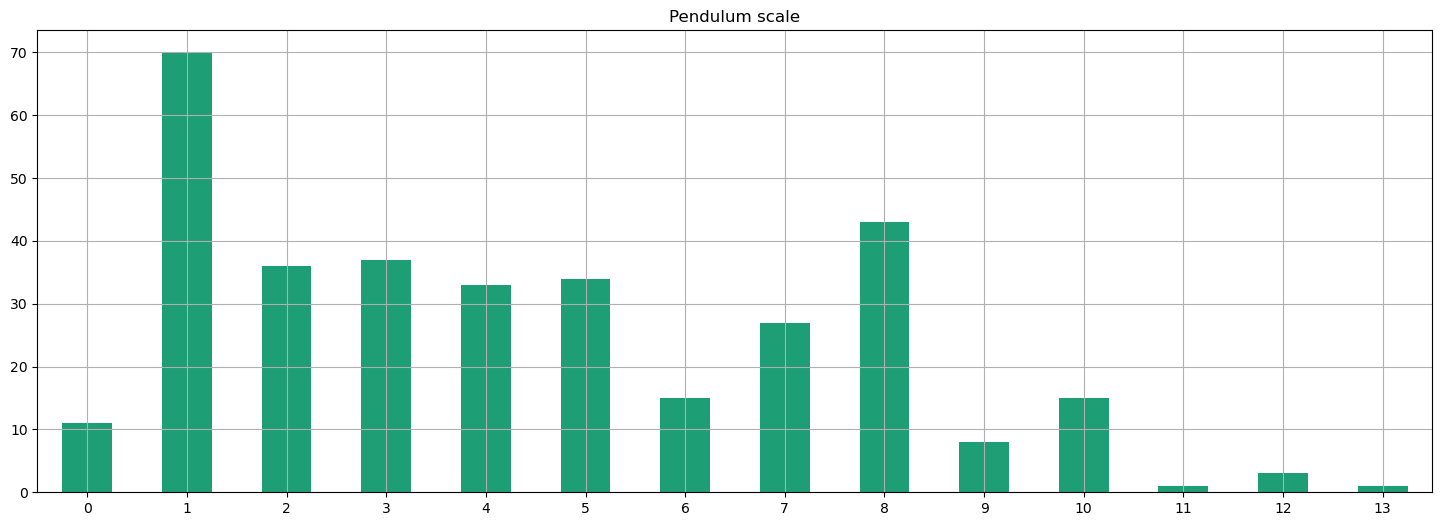

In [54]:
scales_colors = colors_dict["Pendulum Monster"]
monster_df["Pendulum Scale"].value_counts().sort_index(
    key=lambda x: pd.to_numeric(x, errors="coerce")
).plot.bar(
    figsize=(18, 6), grid=True, rot=0, color=scales_colors, title="Pendulum scale"
)
plt.show()

#### ATK statistics

In [55]:
monster_df[["Pendulum Scale", "ATK"]].apply(
    pd.to_numeric, errors="coerce"
).dropna().astype(int).groupby("Pendulum Scale").describe()

ATK                                                    \
               count         mean          std     min     25%     50%   
Pendulum Scale                                                           
0               11.0  1281.818182  1300.629218     0.0     0.0  1100.0   
1               69.0  1740.579710  1034.737654     0.0  1000.0  1800.0   
2               36.0  1423.611111   688.734462   100.0   800.0  1500.0   
3               37.0  1463.513514   848.417534     0.0   600.0  1750.0   
4               33.0  1824.242424  1017.972956     0.0  1200.0  2000.0   
5               34.0  1339.705882   808.831875     0.0   850.0  1325.0   
6               15.0  1320.000000   707.308783   100.0   950.0  1500.0   
7               27.0  1279.629630   787.920737     0.0   700.0  1400.0   
8               43.0  1211.627907   946.222893     0.0   300.0  1200.0   
9                8.0  2150.000000   730.948503  1000.0  2050.0  2400.0   
10              15.0  1766.666667  1369.914839     0.0   250.0  2500.0   
11               1.0   100.000000          NaN   100.0   100.0   100.0   
12               2.0  1550.000000  2050.609665   100.0   825.0  1550.0   
13               1.0     0.000000          NaN     0.0     0.0     0.0   

                                
                   75%     max  
Pendulum Scale                  
0               2500.0  3000.0  
1               2500.0  4000.0  
2               2000.0  2500.0  
3               2100.0  2600.0  
4               2700.0  3000.0  
5               1800.0  3450.0  
6               1800.0  2400.0  
7               1750.0  3000.0  
8               1900.0  3300.0  
9               2500.0  2800.0  
10              2950.0  3000.0  
11               100.0   100.0  
12              2275.0  3000.0  
13                 0.0     0.0

#### DEF statistics

In [56]:
monster_df[["Pendulum Scale", "DEF"]].apply(
    pd.to_numeric, errors="coerce"
).dropna().astype(int).groupby("Pendulum Scale").describe()

DEF                                                    \
               count         mean          std     min     25%     50%   
Pendulum Scale                                                           
0               11.0  1154.545455  1217.672892     0.0     0.0   700.0   
1               70.0  1632.857143   968.447350     0.0  1000.0  1800.0   
2               36.0  1338.888889   728.316171     0.0   875.0  1200.0   
3               37.0  1144.594595   787.910720     0.0   500.0  1200.0   
4               33.0  1563.636364   834.347867     0.0  1000.0  1600.0   
5               34.0  1136.764706   822.625953     0.0   550.0  1000.0   
6               15.0  1226.666667   711.604492   400.0   600.0  1100.0   
7               27.0  1312.962963   830.383669     0.0   700.0  1300.0   
8               43.0  1048.837209   761.693631     0.0   400.0  1000.0   
9                8.0  1225.000000   636.396103  1000.0  1000.0  1000.0   
10              15.0  1926.666667  1123.430122     0.0  1000.0  2500.0   
11               1.0   100.000000          NaN   100.0   100.0   100.0   
12               2.0  1550.000000  2050.609665   100.0   825.0  1550.0   
13               1.0     0.000000          NaN     0.0     0.0     0.0   

                                
                   75%     max  
Pendulum Scale                  
0               2500.0  3000.0  
1               2400.0  4000.0  
2               1825.0  2700.0  
3               1800.0  3000.0  
4               2300.0  2800.0  
5               1575.0  3000.0  
6               1700.0  2600.0  
7               2000.0  2700.0  
8               1600.0  2700.0  
9               1000.0  2800.0  
10              2700.0  3000.0  
11               100.0   100.0  
12              2275.0  3000.0  
13                 0.0     0.0

#### Level/Rank statistics

In [57]:
monster_df[["Pendulum Scale", "Level/Rank"]].apply(
    pd.to_numeric, errors="coerce"
).dropna().astype(int).groupby("Pendulum Scale").describe()

Level/Rank                                                  
                    count      mean       std  min   25%   50%    75%   max
Pendulum Scale                                                             
0                    11.0  5.636364  3.529100  1.0  2.00   7.0   8.00  10.0
1                    70.0  6.042857  2.410338  1.0  4.00   6.0   8.00  12.0
2                    36.0  4.416667  1.380993  1.0  3.75   4.0   5.00   7.0
3                    37.0  4.432432  1.708484  1.0  4.00   4.0   5.00  10.0
4                    33.0  5.606061  2.135114  1.0  4.00   6.0   7.00   8.0
5                    34.0  4.176471  1.961301  1.0  3.00   4.0   4.00  11.0
6                    15.0  3.933333  1.579632  1.0  3.00   4.0   4.50   8.0
7                    27.0  4.185185  1.641693  2.0  3.00   4.0   5.00  10.0
8                    43.0  3.860465  2.284330  1.0  2.00   4.0   5.00  10.0
9                     8.0  5.625000  1.302470  4.0  5.00   5.0   6.25   8.0
10                   15.0  7.066667  3.034720  1.0  7.00   7.0   9.00  12.0
11                    1.0  1.000000       NaN  1.0  1.00   1.0   1.00   1.0
12                    3.0  8.333333  6.350853  1.0  6.50  12.0  12.00  12.0
13                    1.0  7.000000       NaN  7.0  7.00   7.0   7.00   7.0

### Link

In [58]:
monster_df.drop(
    columns=[
        "Card type",
        "Primary type",
        "Secondary type",
        "Level/Rank",
        "DEF",
        "Pendulum Scale",
        "Page name",
        "Page URL",
    ]
).groupby("Link").nunique().sort_index(key=lambda x: pd.to_numeric(x, errors="coerce"))

Name  Password  Archseries  Attribute  Monster type  Effect type  \
Link                                                                     
1       51        51          27          6            12           18   
2      188       188         103          6            23           32   
3       84        84          48          6            16           25   
4       46        42          24          6            16           21   
5        9         6           5          2             5            6   
6        2         2           2          1             1            2   

      Link Arrows  ATK  TCG status  OCG status  Artwork  Modification date  \
Link                                                                         
1               8   11           3           3        1                 51   
2              19   24           2           3        3                188   
3              17   18           2           2        2                 84   
4              13   12           3           5        3                 46   
5               3    4           2           2        0                  9   
6               2    2           1           1        0                  2   

      Errata  
Link          
1          1  
2          3  
3          2  
4          1  
5          0  
6          0

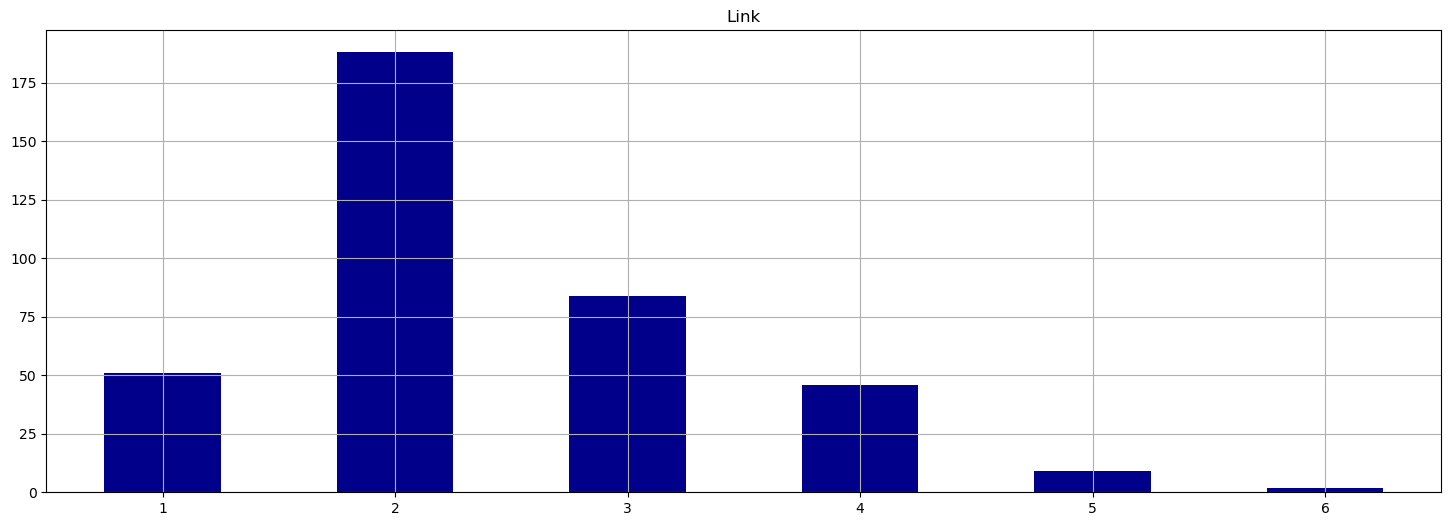

In [59]:
link_colors = colors_dict["Link Monster"]
monster_df["Link"].value_counts().sort_index(
    key=lambda x: pd.to_numeric(x, errors="coerce")
).plot.bar(figsize=(18, 6), grid=True, rot=0, color=link_colors, title="Link")
plt.show()

#### ATK statistics

In [60]:
monster_df[["Link", "ATK"]].apply(pd.to_numeric, errors="coerce").dropna().astype(
    int
).groupby("Link").describe()

ATK                                                                  
      count         mean          std     min     25%     50%     75%     max
Link                                                                         
1      51.0   758.823529   575.561107     0.0   300.0   800.0  1000.0  3000.0
2     188.0  1413.563830   512.114795     0.0  1100.0  1500.0  1800.0  2300.0
3      84.0  2258.928571   651.234264     0.0  2200.0  2400.0  2500.0  4000.0
4      45.0  2671.111111   641.242481     0.0  2500.0  2800.0  3000.0  3300.0
5       9.0  3277.777778   712.000312  2500.0  3000.0  3000.0  3500.0  5000.0
6       2.0  1750.000000  2474.873734     0.0   875.0  1750.0  2625.0  3500.0

### Link Arrows

#### By combination

In [61]:
print("Total number of link arrow combinations:", monster_df["Link Arrows"].nunique())

Total number of link arrow combinations:

62

In [62]:
monster_df.drop(
    columns=[
        "Card type",
        "Primary type",
        "Level/Rank",
        "Pendulum Scale",
        "Link",
        "Secondary type",
        "DEF",
        "Page name",
        "Page URL",
    ]
).groupby("Link Arrows").nunique()

Name  Password  Archseries  Attribute  Monster type  \
Link Arrows                                                         
(←,)             5         5           4          2             3   
(←, ↑)           4         4           2          2             3   
(←, →)          18        18           9          6             8   
(←, →, ↑)        8         8           5          4             5   
(↑,)            10        10           5          5             5   
...            ...       ...         ...        ...           ...   
(↙, ↘, ←, ↖)     1         1           1          1             1   
(↙, ↘, ↑)       22        22          15          6            11   
(↙, ↘, →)        2         2           2          2             2   
(↙, ↘, ↖)        2         2           0          2             2   
(↙, ↘, ↖, ↗)     1         1           1          1             1   

              Effect type  ATK  TCG status  OCG status  Artwork  \
Link Arrows                                                       
(←,)                    4    2           3           2        0   
(←, ↑)                  3    4           1           1        0   
(←, →)                  8   11           2           2        1   
(←, →, ↑)               7    6           1           1        0   
(↑,)                    9    6           1           1        0   
...                   ...  ...         ...         ...      ...   
(↙, ↘, ←, ↖)            1    1           1           1        0   
(↙, ↘, ↑)              11   11           2           2        2   
(↙, ↘, →)               2    2           1           1        0   
(↙, ↘, ↖)               2    2           1           1        0   
(↙, ↘, ↖, ↗)            1    1           1           1        0   

              Modification date  Errata  
Link Arrows                              
(←,)                          5       0  
(←, ↑)                        4       0  
(←, →)                       18       0  
(←, →, ↑)                     8       0  
(↑,)                         10       0  
...                         ...     ...  
(↙, ↘, ←, ↖)                  1       0  
(↙, ↘, ↑)                    22       2  
(↙, ↘, →)                     2       0  
(↙, ↘, ↖)                     2       0  
(↙, ↘, ↖, ↗)                  1       1  

[62 rows x 12 columns]

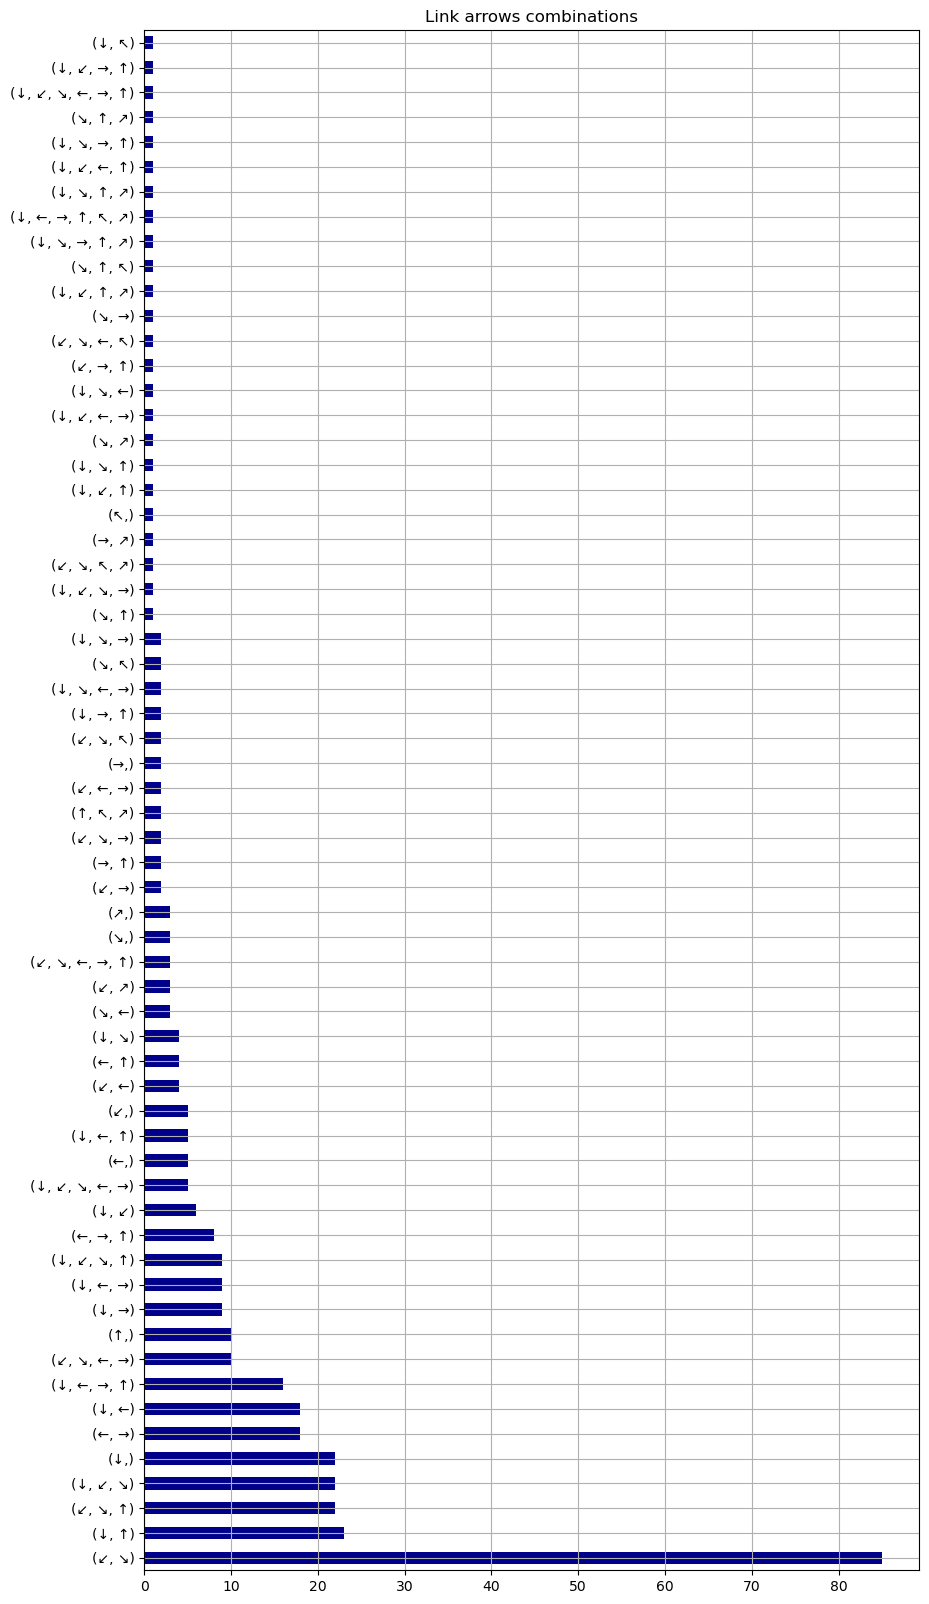

In [63]:
arrows_colors = colors_dict["Link Monster"]
monster_df["Link Arrows"].value_counts().plot.barh(
    figsize=(10, 20), grid=True, color=arrows_colors, title="Link arrows combinations"
)
plt.show()

#### By unique

In [64]:
monster_df[monster_df["Link Arrows"].notna()].drop(
    columns=[
        "Card type",
        "Primary type",
        "Level/Rank",
        "Pendulum Scale",
        "Secondary type",
        "DEF",
        "Page name",
        "Page URL",
    ]
).explode("Link Arrows").groupby("Link Arrows").nunique()

Name  Password  Archseries  Attribute  Monster type  Effect type  \
Link Arrows                                                                     
←             118       112          46          6            21           35   
↑             120       116          46          6            20           31   
→             104        98          40          6            19           30   
↓             168       161          71          6            20           42   
↖              12        12           6          5             5            7   
↗              16        16           8          5             7            7   
↘             190       186         103          6            22           36   
↙             192       188         104          6            22           37   

             Link  ATK  TCG status  OCG status  Artwork  Modification date  \
Link Arrows                                                                  
←               6   29           4           3        3                118   
↑               6   27           3           5        3                120   
→               6   27           3           3        2                104   
↓               6   32           3           6        3                167   
↖               5   10           1           1        2                 12   
↗               6   11           1           1        2                 16   
↘               6   33           3           6        3                190   
↙               6   34           3           6        3                192   

             Errata  
Link Arrows          
←                 1  
↑                 2  
→                 1  
↓                 1  
↖                 1  
↗                 1  
↘                 3  
↙                 3

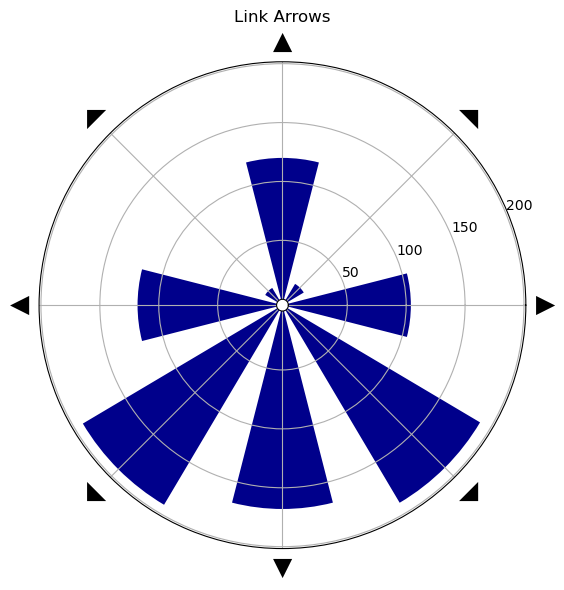

In [65]:
arrow_plot(monster_df["Link Arrows"].explode("Link Arrows"))

#### By link

In [66]:
arrow_per_link = monster_df[["Link Arrows", "Link"]].explode("Link Arrows").dropna()
arrow_crosstab = pd.crosstab(arrow_per_link["Link Arrows"], arrow_per_link["Link"])
arrow_crosstab

Link          1    2   3   4  5  6
Link Arrows                       
←             5   47  25  31  8  2
↑            10   30  44  30  4  2
→             2   33  26  32  9  2
↓            22   61  43  34  6  2
↖             1    3   5   2  0  1
↗             3    5   3   3  1  1
↘             3   97  54  26  9  1
↙             5  100  52  26  8  1

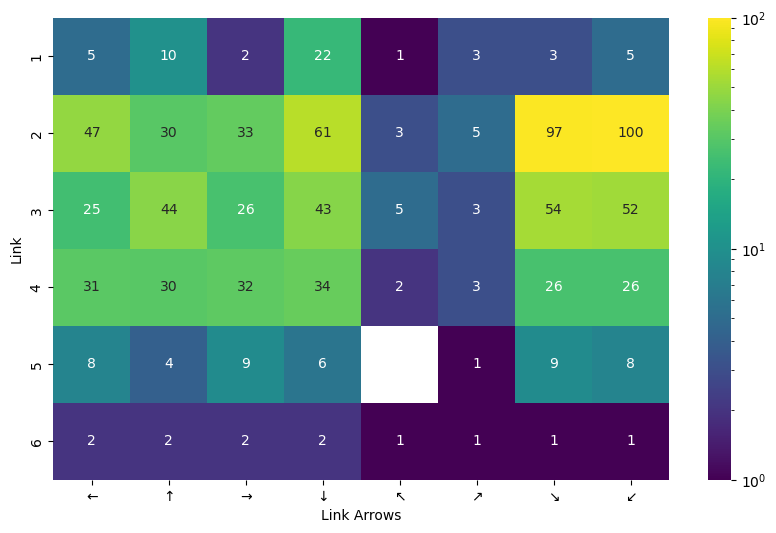

In [67]:
plt.figure(figsize=(10, 6))
sns.heatmap(
    arrow_crosstab[arrow_crosstab > 0].T,
    annot=True,
    fmt="g",
    cmap="viridis",
    square=True,
    norm=mc.LogNorm(),
)
plt.show()

## Spell & Trap

### Properties

In [68]:
print("Total number of properties:", st_df["Property"].nunique())

Total number of properties:

9

In [69]:
st_df.drop(columns=["Card type", "Page name", "Page URL"]).groupby("Property").nunique()

Name  Password  Archseries  Effect type  TCG status  \
Property                                                                     
Continuous Spell Card   425       423         165           56           5   
Continuous Trap Card    504       492         166           65           2   
Counter Trap Card       160       157          63           19           2   
Equip Spell Card        266       265          76           37           2   
Field Spell Card        282       278         148           36           4   
Normal Spell Card       942       936         237           44           5   
Normal Trap Card       1189      1185         248           48           5   
Quick-Play Spell Card   446       440         144           34           2   
Ritual Spell Card        77        77          26            8           1   

                       OCG status  Artwork  Modification date  Errata  
Property                                                               
Continuous Spell Card           5        2                422       4  
Continuous Trap Card            4        1                503       4  
Counter Trap Card               3        1                160       3  
Equip Spell Card                3        1                266       4  
Field Spell Card                5        1                283       4  
Normal Spell Card               6        3                941       4  
Normal Trap Card                5        2               1187       3  
Quick-Play Spell Card           4        1                445       4  
Ritual Spell Card               1        1                 77       3

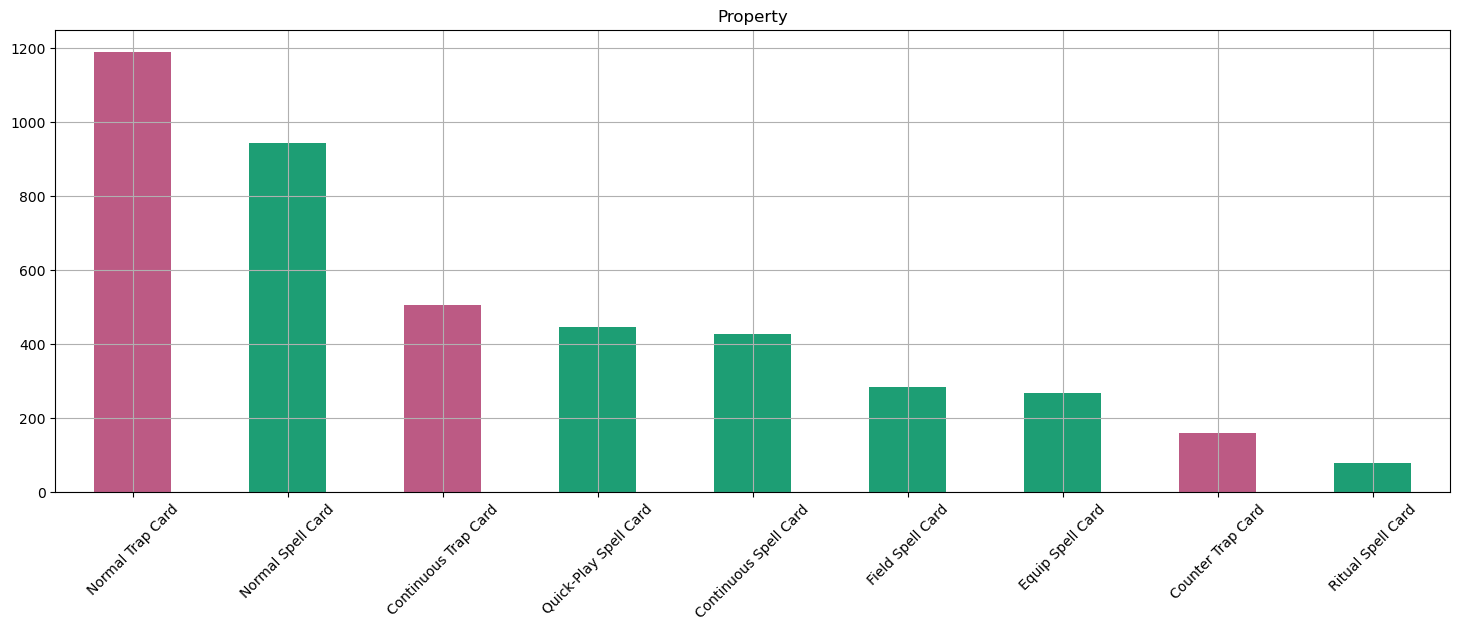

In [70]:
st_colors = [
    colors_dict[i]
    for i in cards_df[["Card type", "Property"]]
    .value_counts()
    .index.get_level_values(0)
]
st_df["Property"].value_counts().plot.bar(
    figsize=(18, 6), grid=True, rot=45, color=st_colors, title="Property"
)
plt.show()

### Effect type

In [71]:
print("Total number of effect types:", st_df["Effect type"].explode().nunique())

Total number of effect types:

14

In [72]:
st_df.explode("Effect type").groupby("Effect type").nunique()

Name  Password  Card type  Property  Archseries  \
Effect type                                                               
Activation condition     830       823          2         8         173   
Condition               1753      1731          2         9         390   
Continuous Effect         21        21          2         6          12   
Continuous-like Effect   914       902          2         7         241   
Cost                     447       444          2         7         115   
Effect                  3015      2989          2         9         446   
Ignition Effect            2         2          2         2           2   
Ignition-like Effect     460       457          1         6         192   
Lingering effect          95        95          2         6          42   
Maintenance cost          22        22          2         5           7   
Quick Effect              10        10          2         3           4   
Quick-like Effect        362       352          2         4         156   
Trigger Effect           859       854          2         9         267   
Unclassified effect       86        85          2         9          50   

                        TCG status  OCG status  Page name  Page URL  Artwork  \
Effect type                                                                    
Activation condition             4           5        830       830        2   
Condition                        6           5       1754      1754        2   
Continuous Effect                1           1         21        21        1   
Continuous-like Effect           5           5        915       915        2   
Cost                             4           5        447       447        2   
Effect                           6           6       3016      3016        3   
Ignition Effect                  1           1          2         2        0   
Ignition-like Effect             3           5        460       460        2   
Lingering effect                 3           4         95        95        1   
Maintenance cost                 2           2         22        22        1   
Quick Effect                     1           1         10        10        0   
Quick-like Effect                3           4        362       362        1   
Trigger Effect                   3           5        859       859        1   
Unclassified effect              1           3         86        86        1   

                        Modification date  Errata  
Effect type                                        
Activation condition                  827       4  
Condition                            1737       4  
Continuous Effect                      21       2  
Continuous-like Effect                912       4  
Cost                                  447       4  
Effect                               2993       4  
Ignition Effect                         2       1  
Ignition-like Effect                  455       3  
Lingering effect                       95       3  
Maintenance cost                       22       2  
Quick Effect                           10       2  
Quick-like Effect                     361       2  
Trigger Effect                        855       4  
Unclassified effect                    86       1

#### Spell & Trap discrimination

In [73]:
st_diff = (
    st_df[["Card type", "Effect type"]]
    .explode("Effect type")
    .value_counts()
    .unstack(0)
    .fillna(0)
    .astype(int)
)
st_diff

Card type               Spell Card  Trap Card
Effect type                                  
Activation condition           244        586
Condition                     1184        570
Continuous Effect                7         14
Continuous-like Effect         627        288
Cost                           238        209
Effect                        1579       1437
Ignition Effect                  1          1
Ignition-like Effect           460          0
Lingering effect                55         40
Maintenance cost                11         11
Quick Effect                     4          6
Quick-like Effect                3        359
Trigger Effect                 582        277
Unclassified effect             64         22

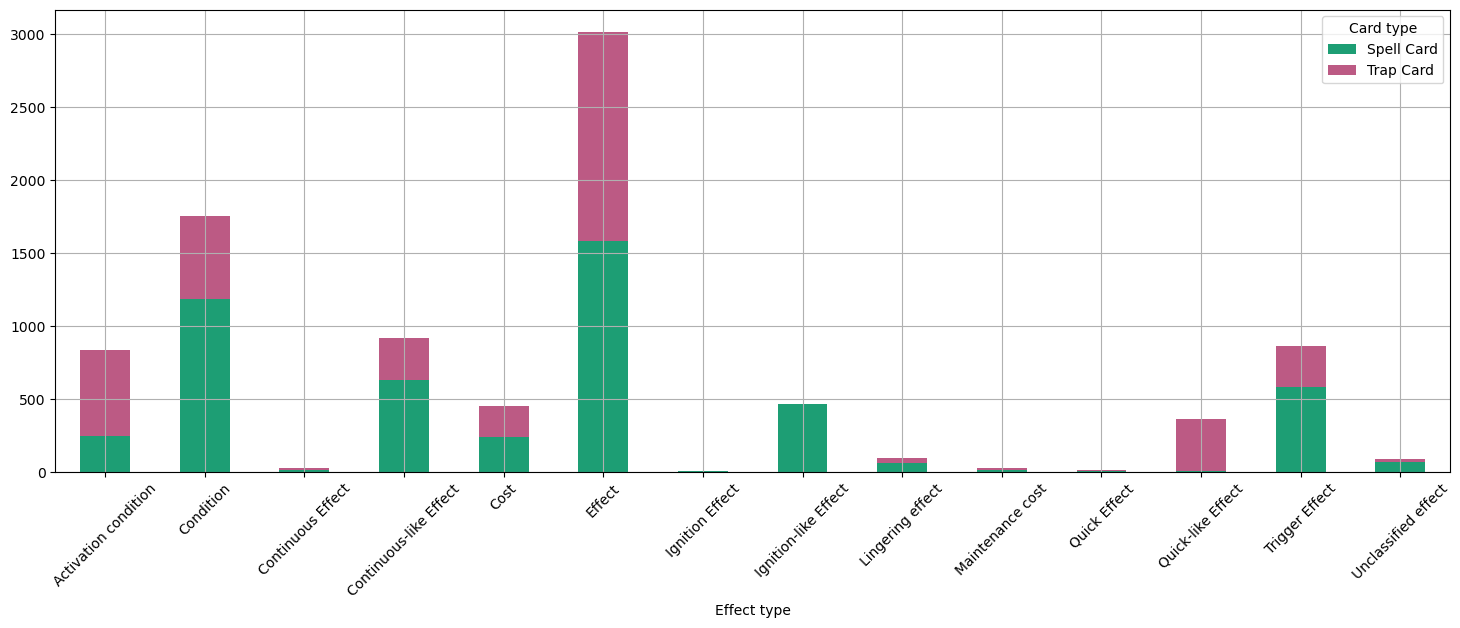

In [74]:
st_diff_colors = {
    "Spell Card": colors_dict["Spell Card"],
    "Trap Card": colors_dict["Trap Card"],
}
st_diff.plot.bar(figsize=(18, 6), stacked=True, grid=True, rot=45, color=st_diff_colors)
plt.show()

## Archseries

In [75]:
exploded_archseries = cards_df.explode("Archseries")
print("Total number of Archseries:", exploded_archseries["Archseries"].nunique())

Total number of Archseries:

729

In [76]:
exploded_archseries.groupby("Archseries").nunique()

Name  Password  Card type  Property  Effect type  \
Archseries                                                            
"C"                   9         9          1         0            7   
-Eyes Dragon         73        73          1         0           44   
/Assault Mode         7         7          1         0            5   
@Ignister            18        18          1         0            9   
A-to-Z               16        16          1         0            5   
...                 ...       ...        ...       ...          ...   
sphinx               10        10          2         1            9   
sprout                2         2          1         0            2   
tellarknight         25        25          2         4           12   
with Chain            4         4          1         1            4   
with Eyes of Blue     8         8          2         2            6   

                   TCG status  OCG status  Page name  Page URL  Artwork  \
Archseries                                                                
"C"                         2           1          9         9        0   
-Eyes Dragon                2           2         73        73        1   
/Assault Mode               1           1          7         7        0   
@Ignister                   1           1         18        18        0   
A-to-Z                      1           1         16        16        2   
...                       ...         ...        ...       ...      ...   
sphinx                      1           1         10        10        0   
sprout                      1           1          2         2        0   
tellarknight                1           2         25        25        0   
with Chain                  1           1          4         4        1   
with Eyes of Blue           1           1          8         8        0   

                   Modification date  Errata  Attribute  Primary type  \
Archseries                                                              
"C"                                9       2          1             2   
-Eyes Dragon                      72       4          6             7   
/Assault Mode                      7       1          5             1   
@Ignister                         18       0          6             6   
A-to-Z                            16       3          1             3   
...                              ...     ...        ...           ...   
sphinx                            10       1          2             1   
sprout                             2       0          1             1   
tellarknight                      25       1          2             2   
with Chain                         4       1          0             0   
with Eyes of Blue                  8       2          1             1   

                   Secondary type  Monster type  DEF  Pendulum Scale  Link  \
Archseries                                                                   
"C"                             0             1    8               0     0   
-Eyes Dragon                    2             3   13               6     1   
/Assault Mode                   0             6    6               0     0   
@Ignister                       1             1    9               0     3   
A-to-Z                          1             1   12               0     0   
...                           ...           ...  ...             ...   ...   
sphinx                          0             2    5               0     0   
sprout                          0             1    1               0     0   
tellarknight                    0             4   15               2     0   
with Chain                      0             0    0               0     0   
with Eyes of Blue               1             1    4               0     0   

                   Link Arrows  ATK  Level/Rank  
Archseries                                       
"C"                          0    9           8  
-Eye

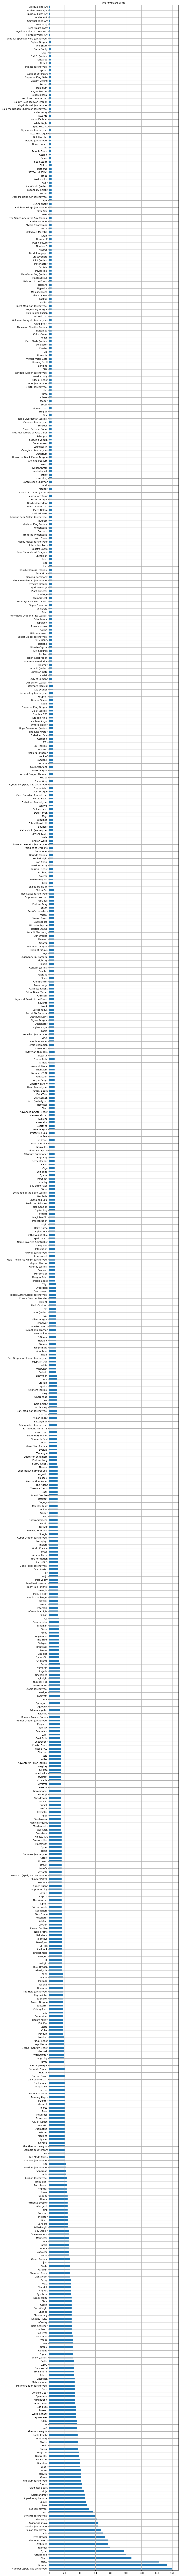

In [77]:
exploded_archseries["Archseries"].value_counts().plot.barh(
    figsize=(10, 200), grid=True, title="Archtypes/Series"
)
plt.show()

### By card type

In [78]:
archseries_crosstab = pd.crosstab(
    exploded_archseries["Archseries"], exploded_archseries["Card type"], margins=True
)
archseries_crosstab

Card type          Monster Card  Spell Card  Trap Card   All
Archseries                                                  
"C"                           9           0          0     9
-Eyes Dragon                 73           0          0    73
/Assault Mode                 7           0          0     7
@Ignister                    18           0          0    18
A-to-Z                       16           0          0    16
...                         ...         ...        ...   ...
sprout                        2           0          0     2
tellarknight                 20           5          0    25
with Chain                    0           0          4     4
with Eyes of Blue             5           3          0     8
All                        7494        1418        945  9857

[730 rows x 4 columns]

### By primary type

In [79]:
archseries_crosstab_b = pd.crosstab(
    exploded_archseries["Archseries"], exploded_archseries["Primary type"], margins=True
)
archseries_crosstab_b

Primary type       Effect Monster  Fusion Monster  Link Monster  \
Archseries                                                        
"C"                             8               0             0   
-Eyes Dragon                   31              11             1   
/Assault Mode                   7               0             0   
@Ignister                      10               1             4   
A-to-Z                          6               8             0   
...                           ...             ...           ...   
sphinx                          9               0             0   
sprout                          2               0             0   
tellarknight                   14               0             0   
with Eyes of Blue               5               0             0   
All                          4823             560           346   

Primary type       Normal Monster  Ritual Monster  Synchro Monster  \
Archseries                                                           
"C"                             1               0                0   
-Eyes Dragon                    3               4                5   
/Assault Mode                   0               0                0   
@Ignister                       0               1                1   
A-to-Z                          2               0                0   
...                           ...             ...              ...   
sphinx                          0               0                0   
sprout                          0               0                0   
tellarknight                    0               0                0   
with Eyes of Blue               0               0                0   
All                           220             128              460   

Primary type       Xyz Monster   All  
Archseries                            
"C"                          0     9  
-Eyes Dragon                18    73  
/Assault Mode                0     7  
@Ignister                    1    18  
A-to-Z                       0    16  
...                        ...   ...  
sphinx                       0     9  
sprout                       0     2  
tellarknight                 6    20  
with Eyes of Blue            0     5  
All                        953  7490  

[663 rows x 8 columns]



### By secondary type

In [80]:
exploded_archseries_secondary_type = exploded_archseries[
    ["Archseries", "Secondary type"]
].explode("Secondary type")
archseries_crosstab_c = pd.crosstab(
    exploded_archseries_secondary_type["Archseries"],
    exploded_archseries_secondary_type["Secondary type"],
    margins=True,
)
archseries_crosstab_c

Secondary type     Flip monster  Gemini monster  Spirit monster  Toon monster  \
Archseries                                                                      
-Eyes Dragon                  0               2               0             2   
@Ignister                     0               0               0             0   
A-to-Z                        0               0               0             0   
Adamancipator                 0               0               0             0   
Alien                         1               1               0             0   
...                         ...             ...             ...           ...   
itsu                          0               0               0             0   
lswarm                        2               0               0             0   
roid                          0               0               0             0   
with Eyes of Blue             0               0               0             0   
All                         129              28              13            36   

Secondary type     Tuner monster  Union monster  All  
Archseries                                            
-Eyes Dragon                   0              0    4  
@Ignister                      1              0    1  
A-to-Z                         0              6    6  
Adamancipator                  3              0    3  
Alien                          1              0    3  
...                          ...            ...  ...  
itsu                           0              2    2  
lswarm                         0              0    2  
roid                           9              0    9  
with Eyes of Blue              5              0    5  
All                          472             18  696  

[205 rows x 7 columns]

### By monster type

In [81]:
archseries_crosstab_d = pd.crosstab(
    exploded_archseries["Archseries"], exploded_archseries["Monster type"], margins=True
)
archseries_crosstab_d

Monster type       Aqua  Beast  Beast-Warrior  Creator God  Cyberse  Dinosaur  \
Archseries                                                                      
"C"                   0      0              0            0        0         0   
-Eyes Dragon          0      0              0            0        0         0   
/Assault Mode         0      0              0            0        0         0   
@Ignister             0      0              0            0       18         0   
A-to-Z                0      0              0            0        0         0   
...                 ...    ...            ...          ...      ...       ...   
sphinx                0      3              0            0        0         0   
sprout                0      0              0            0        0         0   
tellarknight          0      0              0            0        0         0   
with Eyes of Blue     0      0              0            0        0         0   
All                 197    303            187            2      161        92   

Monster type       Divine-Beast  Dragon  Fairy  Fiend  Fish  Illusion  Insect  \
Archseries                                                                      
"C"                           0       0      0      0     0         0       9   
-Eyes Dragon                  0      68      0      0     0         0       0   
/Assault Mode                 0       2      0      0     0         0       0   
@Ignister                     0       0      0      0     0         0       0   
A-to-Z                        0       0      0      0     0         0       0   
...                         ...     ...    ...    ...   ...       ...     ...   
sphinx                        0       0      0      0     0         0       0   
sprout                        0       0      0      0     0         0       0   
tellarknight                  0       0      0      1     0         0       0   
with Eyes of Blue             0       0      0      0     0         0       0   
All                          12     737    460    720    76         3     165   

Monster type       Machine  Plant  Psychic  Pyro  Reptile  Rock  Sea Serpent  \
Archseries                                                                     
"C"                      0      0        0     0        0     0            0   
-Eyes Dragon             2      0        0     0        0     0            0   
/Assault Mode            1      0        1     0        0     0            0   
@Ignister                0      0        0     0        0     0            0   
A-to-Z                  16      0        0     0        0     0            0   
...                    ...    ...      ...   ...      ...   ...          ...   
sphinx                   0      0        0     0        0     6            0   
sprout                   0      2        0     0        0     0            0   
tellarknight             0      0        0     0        0     0            0   
with Eyes of Blue        0      0        0     0        0     0            0   
All                   1025    184      159   103      140   221           71   

Monster type       Spellcaster  Thunder  Warrior  Winged Beast  Wyrm  Zombie  \
Archseries                                                                     
"C"                          0        0        0             0     0       0   
-Eyes Dragon                 0        0        0             0     0       3   
/Assault Mode                1        0        1             0     0       1   
@Ignister                    0        0        0             0     0       0   
A-to-Z                       0        0        0             0     0       0   
...                        ...      ...      ...           ...   ...     ...   
sphinx                       0        0        0             0     0       0   
sprout                       0        0        0             0     0       0   
tellarknight                 1        0       17   

### By property

In [82]:
archseries_crosstab_e = pd.crosstab(
    exploded_archseries["Archseries"], exploded_archseries["Property"], margins=True
)
archseries_crosstab_e

Property           Continuous Spell Card  Continuous Trap Card  \
Archseries                                                       
A.I.                                   1                     3   
Abyss Actor                            0                     0   
Abyss Script                           1                     0   
Abyss-                                 0                     1   
Adamancipator                          0                     0   
...                                  ...                   ...   
sphinx                                 0                     1   
tellarknight                           1                     0   
with Chain                             0                     0   
with Eyes of Blue                      1                     0   
All                                  250                   298   

Property           Counter Trap Card  Equip Spell Card  Field Spell Card  \
Archseries                                                                 
A.I.                               0                 0                 1   
Abyss Actor                        0                 0                 0   
Abyss Script                       0                 0                 0   
Abyss-                             0                 3                 0   
Adamancipator                      1                 0                 1   
...                              ...               ...               ...   
sphinx                             0                 0                 0   
tellarknight                       0                 1                 1   
with Chain                         0                 0                 0   
with Eyes of Blue                  0                 0                 0   
All                               84               138               188   

Property           Normal Spell Card  Normal Trap Card  Quick-Play Spell Card  \
Archseries                                                                      
A.I.                               4                 1                      2   
Abyss Actor                        1                 2                      0   
Abyss Script                       5                 0                      1   
Abyss-                             0                 3                      0   
Adamancipator                      2                 1                      0   
...                              ...               ...                    ...   
sphinx                             0                 0                      0   
tellarknight                       0                 0                      2   
with Chain                         0                 4                      0   
with Eyes of Blue                  0                 0                      2   
All                              529               563                    272   

Property           Ritual Spell Card   All  
Archseries                                  
A.I.                               1    13  
Abyss Actor                        0     3  
Abyss Script                       0     7  
Abyss-                             0     7  
Adamancipator                      0     5  
...                              ...   ...  
sphinx                             0     1  
tellarknight                       0     5  
with Chain                         0     4  
with Eyes of Blue                  0     3  
All                               41  2363  

[411 rows x 10 columns]

## Artworks

In [83]:
print(
    "Total number of cards with edited or alternate artworks:",
    cards_df["Artwork"].count(),
)

Total number of cards with edited or alternate artworks:

632

In [84]:
cards_df[["Name", "Password", "TCG status", "OCG status", "Artwork"]][
    cards_df["Artwork"].notna()
]

Name  Password TCG status OCG status    Artwork
17           A Deal with Dark Ruler  06850209  Unlimited  Unlimited  (Edited,)
31      A-to-Z-Dragon Buster Cannon  65172015  Unlimited  Unlimited  (Edited,)
50                     Absolute End  27744077  Unlimited  Unlimited  (Edited,)
55       Absorbing Kid from the Sky  49771608  Unlimited  Unlimited  (Edited,)
65     Abyss Actor - Mellow Madonna  78310590  Unlimited  Unlimited  (Edited,)
...                             ...       ...        ...        ...        ...
12284         Yorishiro of the Aqua  57511992  Unlimited  Unlimited  (Edited,)
12397                       Zombino  14575467  Unlimited  Unlimited  (Edited,)
12399              Zombyra the Dark  88472456  Unlimited  Unlimited  (Edited,)
12401               Zoodiac Barrage  46060017  Forbidden    Limited  (Edited,)
12404            Zoodiac Bunnyblast  04367330  Unlimited  Unlimited  (Edited,)

[632 rows x 5 columns]

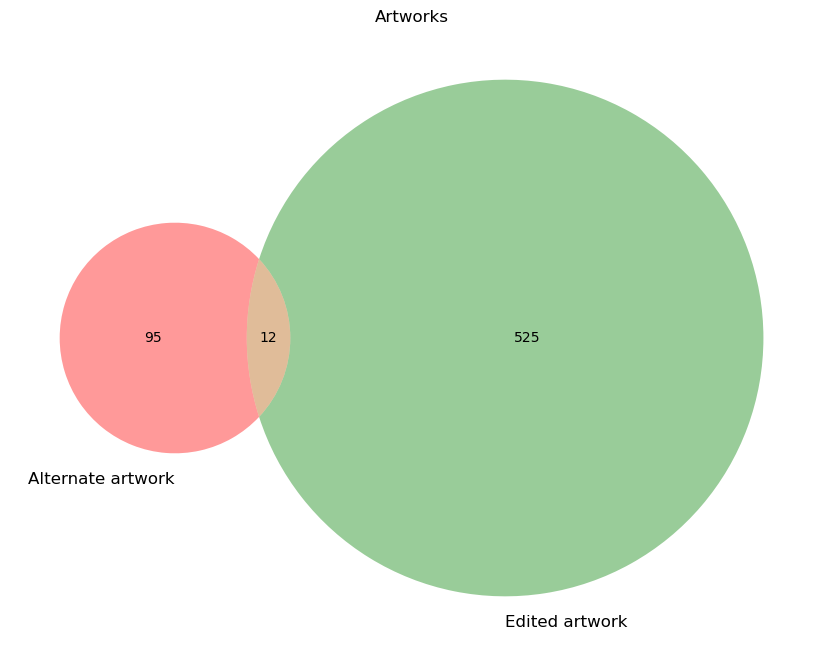

In [85]:
artwork_value_counts = cards_df["Artwork"].value_counts()
plt.figure(figsize=(20, 8))
plt.title("Artworks")
venn2(
    subsets=(
        artwork_value_counts[("Alternate",)],
        artwork_value_counts[("Edited",)],
        artwork_value_counts[("Alternate", "Edited")],
    ),
    set_labels=("Alternate artwork", "Edited artwork"),
)
plt.show()

### By card type

In [86]:
artwork_crosstab = pd.crosstab(cards_df["Artwork"], cards_df["Card type"])
artwork_crosstab

Card type            Monster Card  Spell Card  Trap Card
Artwork                                                 
(Alternate,)                   83           7          5
(Alternate, Edited)            11           1          0
(Edited,)                     296         119        110

### By primary type

In [87]:
artwork_crosstab_b = pd.crosstab(cards_df["Artwork"], cards_df["Primary type"])
artwork_crosstab_b

Primary type         Effect Monster  Fusion Monster  Link Monster  \
Artwork                                                             
(Alternate,)                     36              13             9   
(Alternate, Edited)               3               1             5   
(Edited,)                       193              22            10   

Primary type         Normal Monster  Ritual Monster  Synchro Monster  \
Artwork                                                                
(Alternate,)                     16               0                4   
(Alternate, Edited)               2               0                0   
(Edited,)                        43               7                5   

Primary type         Xyz Monster  
Artwork                           
(Alternate,)                   5  
(Alternate, Edited)            0  
(Edited,)                     16

More granularity is unnecessary

## Errata

In [88]:
print("Total number of cards with errata:", cards_df["Errata"].count())

Total number of cards with errata:

4718

In [89]:
cards_df[["Name", "Password", "TCG status", "OCG status", "Errata"]][
    cards_df["Errata"].notna()
]

Name  Password TCG status OCG status   Errata
0          "A" Cell Breeding Device  34541863  Unlimited  Unlimited  (Name,)
5      "Infernoble Arms - Durendal"  37478723  Unlimited  Unlimited   (Any,)
9                    3-Hump Lacooda  86988864  Unlimited  Unlimited   (Any,)
11        4-Starred Ladybug of Doom  83994646  Unlimited  Unlimited   (Any,)
14                      7 Completed  86198326  Unlimited  Unlimited  (Type,)
...                             ...       ...        ...        ...      ...
12411                Zoodiac Ramram  04145852  Unlimited  Unlimited   (Any,)
12415              Zoodiac Whiptail  31755044  Unlimited  Unlimited   (Any,)
12418                 Zubaba Buster  57036718  Unlimited  Unlimited   (Any,)
12420                 Zubaba Knight  97896503  Unlimited  Unlimited   (Any,)
12423    Zure, Knight of Dark World  07459013  Unlimited  Unlimited  (Type,)

[4718 rows x 5 columns]

In [90]:
errata_counts = (
    cards_df.groupby("Errata").nunique().sort_values("Name", ascending=False)
)
errata_counts

Name  Password  Card type  Property  Archseries  Effect type  \
Errata                                                                       
(Any,)        3478      3473          3         9         617          217   
(Type,)        735       735          3         9         181           83   
(Name,)        387       387          3         9         128           71   
(Name, Type)   110       109          3         6          56           36   

              TCG status  OCG status  Page name  Page URL  Artwork  \
Errata                                                               
(Any,)                 5           5       3480      3480        3   
(Type,)                4           5        737       737        3   
(Name,)                4           3        387       387        2   
(Name, Type)           4           4        114       114        3   

              Modification date  Attribute  Primary type  Secondary type  \
Errata                                                                     
(Any,)                     3459          7             7               8   
(Type,)                     737          7             7               6   
(Name,)                     385          6             7               3   
(Name, Type)                114          7             6               5   

              Monster type  DEF  Pendulum Scale  Link  Link Arrows  ATK  \
Errata                                                                    
(Any,)                  24   59               9     4           10   70   
(Type,)                 24   45               5     2            2   54   
(Name,)                 22   37               3     1            1   43   
(Name, Type)            16   30               0     0            0   35   

              Level/Rank  
Errata                    
(Any,)                13  
(Type,)               12  
(Name,)               11  
(Name, Type)          10

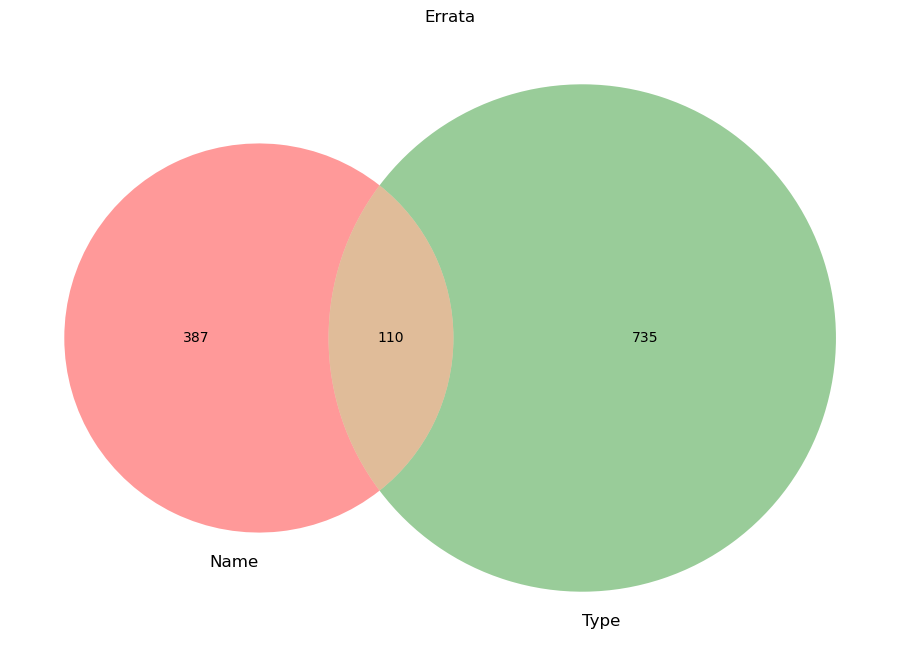

In [91]:
plt.figure(figsize=(20, 8))
plt.title("Errata")
sorted_errata_name_counts = (
    errata_counts["Name"]
    .drop(("Any",))
    .sort_index(key=lambda x: [(len(i), i) for i in x])
)
venn2(
    subsets=sorted_errata_name_counts,
    set_labels=sorted_errata_name_counts.index[:-1].str[0],
)
plt.show()

### By card type

In [92]:
errata_crosstab = pd.crosstab(cards_df["Errata"], cards_df["Card type"])
errata_crosstab.sort_values(by=errata_crosstab.columns.tolist(), ascending=False)

Card type     Monster Card  Spell Card  Trap Card
Errata                                           
(Any,)                2172         672        636
(Type,)                513         214         10
(Name,)                282          54         51
(Name, Type)            93          20          1

### By primary type

In [93]:
errata_crosstab_b = pd.crosstab(cards_df["Errata"], cards_df["Primary type"])
errata_crosstab_b.sort_values(by=errata_crosstab_b.columns.tolist(), ascending=False)

Primary type  Effect Monster  Fusion Monster  Link Monster  Normal Monster  \
Errata                                                                       
(Any,)                  1641             129            15              54   
(Type,)                  325              29             2             107   
(Name,)                  186              46             4              28   
(Name, Type)              45               9             0              28   

Primary type  Ritual Monster  Synchro Monster  Xyz Monster  
Errata                                                      
(Any,)                    36              137          160  
(Type,)                    3               29           17  
(Name,)                    2                9            7  
(Name, Type)               3                5            1

More granularity is unnecessary

### By artwork

In [94]:
errata_crosstab_c = pd.crosstab(cards_df["Artwork"], cards_df["Errata"])
errata_crosstab_c.sort_values(by=errata_crosstab_c.columns.tolist(), ascending=False)

Errata               (Any,)  (Name,)  (Name, Type)  (Type,)
Artwork                                                    
(Edited,)               176       23            15       63
(Alternate,)             32        4            18       27
(Alternate, Edited)       1        0             2        3

## TCG & OCG status

### TGC status

In [95]:
print("Total number of TCG status:", cards_df["TCG status"].nunique())

Total number of TCG status:

6

In [96]:
cards_df.drop(columns=["Page name", "Page URL"]).groupby(
    "TCG status", dropna=False
).nunique()

Name  Password  Card type  Property  Archseries  \
TCG status                                                           
Forbidden           103       103          3         7          57   
Illegal              38         0          3         3           6   
Limited              81        81          3         5          42   
Not yet released      5         5          2         1           3   
Semi-Limited          5         5          3         3           5   
Unlimited         11765     11762          3         9        1184   
NaN                 426       347          3         9          94   

                  Effect type  OCG status  Artwork  Modification date  Errata  \
TCG status                                                                      
Forbidden                  49           4        1                103       4   
Illegal                     6           1        0                 38       3   
Limited                    37           4        3                 81       4   
Not yet released            5           1        0                  5       0   
Semi-Limited                5           2        0                  5       2   
Unlimited                 354           4        3              11655       4   
NaN                        76           3        0                419       2   

                  Attribute  Primary type  Secondary type  Monster type  DEF  \
TCG status                                                                     
Forbidden                 6             5               2            19   21   
Illegal                   6             5               0            14   12   
Limited                   6             6               2            15   19   
Not yet released          3             3               0             3    4   
Semi-Limited              2             2               0             2    2   
Unlimited                 7             7               8            24   75   
NaN                       7             7               2            23   36   

                  Pendulum Scale  Link  Link Arrows  ATK  Level/Rank  
TCG status                                                            
Forbidden                      2     4           10   27          12  
Illegal                        2     2            2   11           5  
Limited                        2     1            1   23           9  
Not yet released               1     0            0    4           3  
Semi-Limited                   0     0            0    2           2  
Unlimited                     14     6           61   80          14  
NaN                            5     3            5   56          11

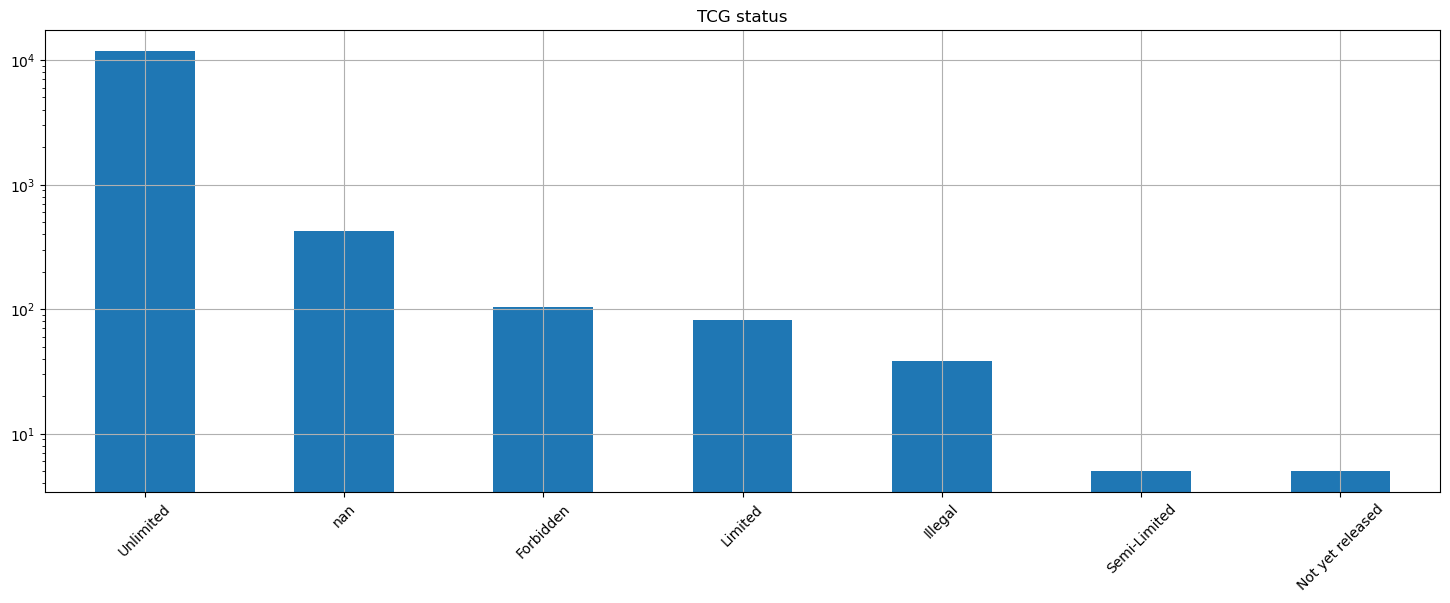

In [97]:
cards_df["TCG status"].value_counts(dropna=False).plot.bar(
    figsize=(18, 6), logy=True, grid=True, rot=45, title="TCG status"
)
plt.show()

#### By card type

In [98]:
# Remove unlimited
tcg_crosstab = pd.crosstab(cards_df["Card type"], cards_df["TCG status"]).drop(
    ["Unlimited"], axis=1
)
tcg_crosstab

TCG status    Forbidden  Illegal  Limited  Not yet released  Semi-Limited
Card type                                                                
Monster Card         67       35       46                 4             2
Spell Card           26        2       33                 1             2
Trap Card            10        1        2                 0             1

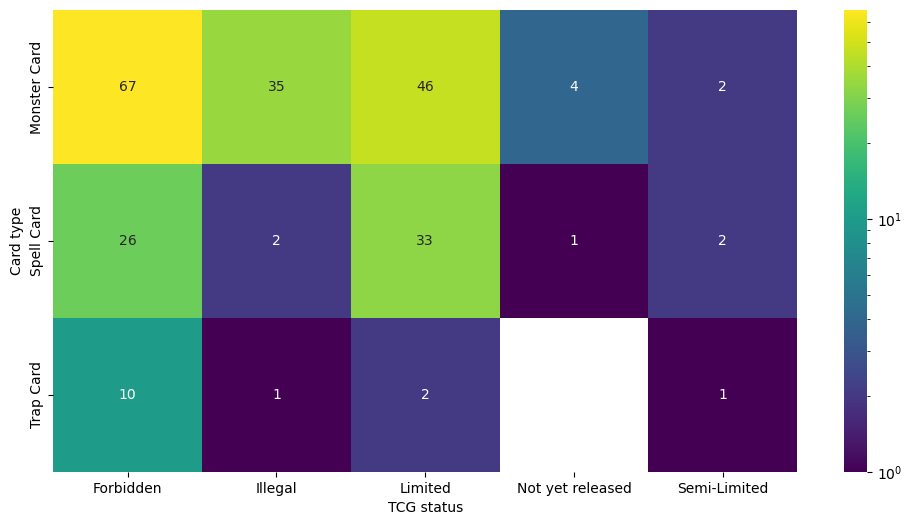

In [99]:
plt.figure(figsize=(12, 6))
sns.heatmap(
    tcg_crosstab[tcg_crosstab > 0],
    annot=True,
    fmt="g",
    cmap="viridis",
    norm=mc.LogNorm(),
)
plt.show()

#### By monster type

In [100]:
# Remove unlimited
tcg_crosstab_b = pd.crosstab(cards_df["Monster type"], cards_df["TCG status"]).drop(
    ["Unlimited"], axis=1
)
tcg_crosstab_b

TCG status     Forbidden  Illegal  Limited  Not yet released  Semi-Limited
Monster type                                                              
Aqua                   2        0        4                 0             0
Beast                  0        3        2                 0             0
Beast-Warrior          2        3        2                 0             0
Cyberse                2        0        1                 0             0
Dinosaur               0        0        2                 0             0
Divine-Beast           0        3        0                 0             0
Dragon                10        3        7                 1             0
Fairy                  4        4        6                 0             0
Fiend                  5        2        2                 0             0
Fish                   1        0        0                 0             0
Insect                 2        0        0                 0             0
Machine                6        4        4                 0             0
Plant                  6        1        0                 1             0
Psychic                2        1        1                 0             0
Pyro                   0        0        0                 0             0
Reptile                1        0        1                 0             0
Rock                   2        1        4                 0             0
Sea Serpent            1        0        0                 0             0
Spellcaster            8        5        7                 0             0
Thunder                2        1        0                 0             0
Warrior                4        2        2                 0             1
Winged Beast           3        2        1                 0             1
Wyrm                   4        0        0                 0             0
Zombie                 0        0        0                 2             0

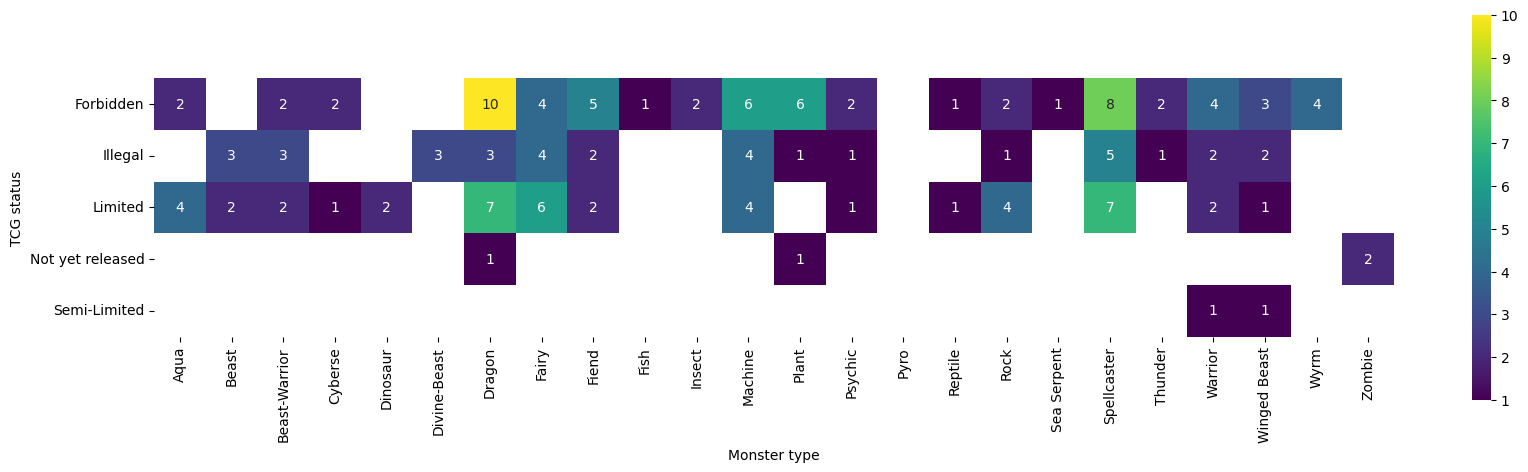

In [101]:
plt.figure(figsize=(20, 5))
sns.heatmap(
    tcg_crosstab_b[tcg_crosstab_b > 0].T,
    annot=True,
    fmt="g",
    cmap="viridis",
    square=True,
)
plt.show()

#### By archseries

In [102]:
# Remove unlimited
tcg_crosstab_c = pd.crosstab(
    exploded_archseries["Archseries"].where(
        exploded_archseries["OCG status"] != "Unlimited"
    ),
    exploded_archseries["TCG status"],
    margins=True,
)
tcg_crosstab_c

TCG status                 Forbidden  Illegal  Limited  Semi-Limited  \
Archseries                                                             
-Eyes Dragon                       1        0        0             0   
Adventurer Token (series)          0        0        0             0   
Amazoness                          0        0        0             0   
Attribute Knight                   0        0        1             0   
Barrier Statue                     1        0        0             0   
...                              ...      ...      ...           ...   
Zexal                              1        0        0             0   
Zoodiac                            3        0        1             0   
roid                               0        0        1             0   
tellarknight                       0        0        0             0   
All                               64       39       38             4   

TCG status                 Unlimited  All  
Archseries                                 
-Eyes Dragon                       0    1  
Adventurer Token (series)          2    2  
Amazoness                          1    1  
Attribute Knight                   0    1  
Barrier Statue                     0    1  
...                              ...  ...  
Zexal                              0    1  
Zoodiac                            0    4  
roid                               0    1  
tellarknight                       1    1  
All                               94  239  

[114 rows x 6 columns]

### OCG status

In [103]:
print("Total number of OCG status:", cards_df["OCG status"].nunique())

Total number of OCG status:

6

In [104]:
cards_df.drop(columns=["Page name", "Page URL"]).groupby(
    "OCG status", dropna=False
).nunique()

Name  Password  Card type  Property  Archseries  \
OCG status                                                           
Forbidden            86        86          3         6          46   
Illegal              32         1          3         2           8   
Limited              76        76          3         7          38   
Not yet released     49         0          3         8          16   
Semi-Limited         26        26          2         4          17   
Unlimited         12079     12055          3         9        1195   
NaN                  71        59          3         6          11   

                  Effect type  TCG status  Artwork  Modification date  Errata  \
OCG status                                                                      
Forbidden                  40           3        1                 86       4   
Illegal                     8           1        0                 32       3   
Limited                    35           3        3                 76       3   
Not yet released           24           0        0                 49       0   
Semi-Limited               16           4        2                 26       3   
Unlimited                 356           5        3              11964       4   
NaN                        25           2        0                 71       2   

                  Attribute  Primary type  Secondary type  Monster type  DEF  \
OCG status                                                                     
Forbidden                 6             5               3            20   19   
Illegal                   6             6               1            12   15   
Limited                   6             6               2            13   21   
Not yet released          5             5               1            10   18   
Semi-Limited              4             4               1             7    7   
Unlimited                 7             7               8            26   76   
NaN                       6             5               1            20   20   

                  Pendulum Scale  Link  Link Arrows  ATK  Level/Rank  
OCG status                                                            
Forbidden                      3     4            8   23          11  
Illegal                        2     2            2   14           8  
Limited                        3     2            2   22           9  
Not yet released               0     1            1   19          10  
Semi-Limited                   0     1            1    8           4  
Unlimited                     13     6           61   81          14  
NaN                            1     1            2   22          11

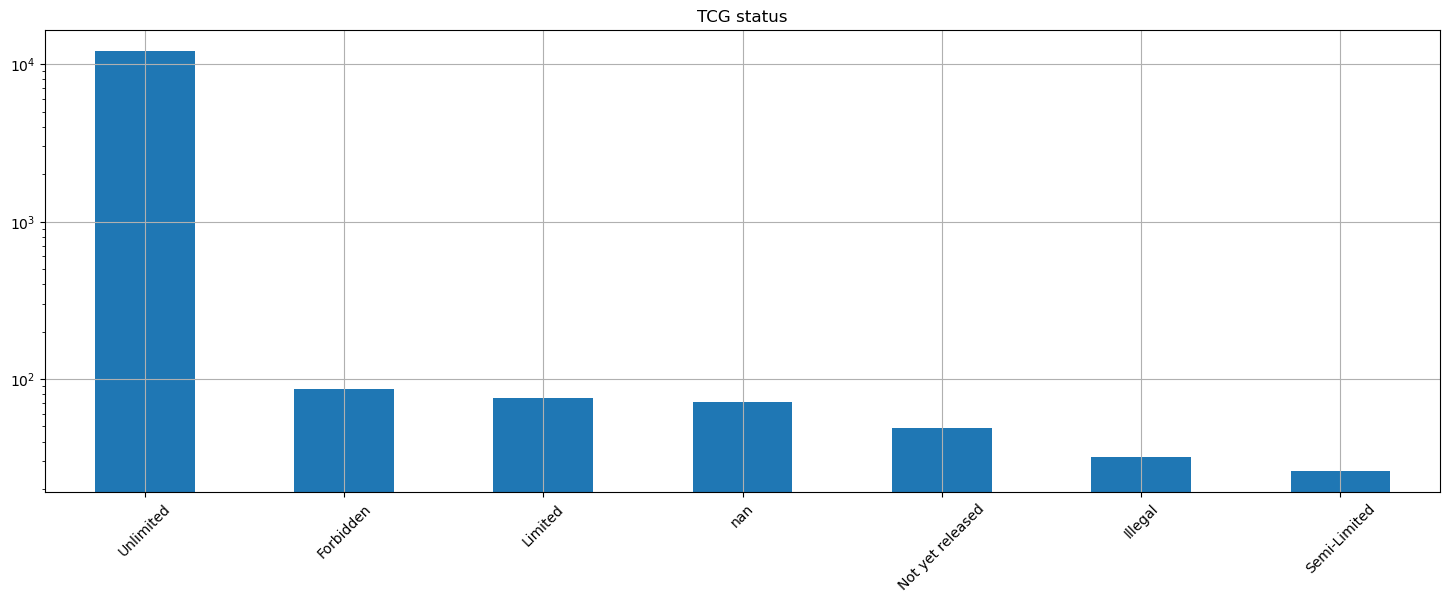

In [105]:
cards_df["OCG status"].value_counts(dropna=False).plot.bar(
    figsize=(18, 6), logy=True, grid=True, rot=45, title="TCG status"
)
plt.show()

#### By card type

In [106]:
# Remove unlimited
ocg_crosstab = pd.crosstab(cards_df["Card type"], cards_df["OCG status"]).drop(
    ["Unlimited"], axis=1
)
ocg_crosstab

OCG status    Forbidden  Illegal  Limited  Not yet released  Semi-Limited
Card type                                                                
Monster Card         55       30       45                31             9
Spell Card           21        1       27                11            17
Trap Card            10        1        4                 7             0

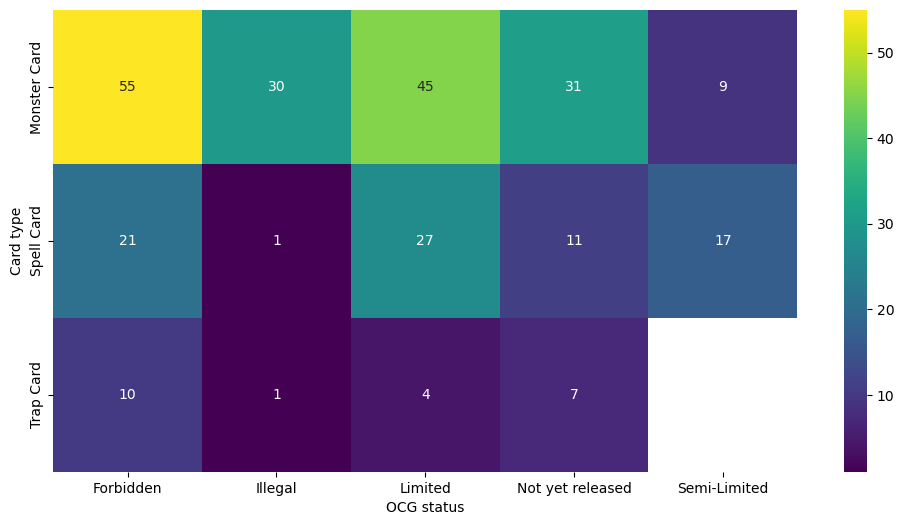

In [107]:
plt.figure(figsize=(12, 6))
sns.heatmap(ocg_crosstab[ocg_crosstab > 0], annot=True, fmt="g", cmap="viridis")
plt.show()

#### By monster type

In [108]:
ocg_crosstab_b = pd.crosstab(cards_df["Monster type"], cards_df["OCG status"]).drop(
    ["Unlimited"], axis=1
)
ocg_crosstab_b

OCG status     Forbidden  Illegal  Limited  Not yet released  Semi-Limited
Monster type                                                              
Aqua                   3        0        3                 0             0
Beast                  1        2        0                 0             0
Beast-Warrior          3        2        1                 0             1
Creator God            0        0        0                 0             0
Cyberse                2        0        0                 4             1
Dinosaur               0        0        1                 2             0
Divine-Beast           0        3        0                 0             0
Dragon                 8        3        8                 1             2
Fairy                  2        3        4                 1             0
Fiend                  5        1        0                11             0
Fish                   1        0        0                 0             0
Illusion               0        0        0                 0             0
Insect                 1        0        0                 0             0
Machine                5        3        5                 1             0
Plant                  4        0        2                 1             0
Psychic                1        1        5                 0             0
Pyro                   0        0        1                 3             0
Reptile                1        0        0                 0             0
Rock                   1        1        2                 2             0
Sea Serpent            1        0        0                 0             0
Spellcaster            7        7        8                 0             1
Thunder                1        0        3                 0             1
Warrior                3        3        2                 5             2
Winged Beast           3        1        0                 0             1
Wyrm                   2        0        0                 0             0
Zombie                 0        0        0                 0             0

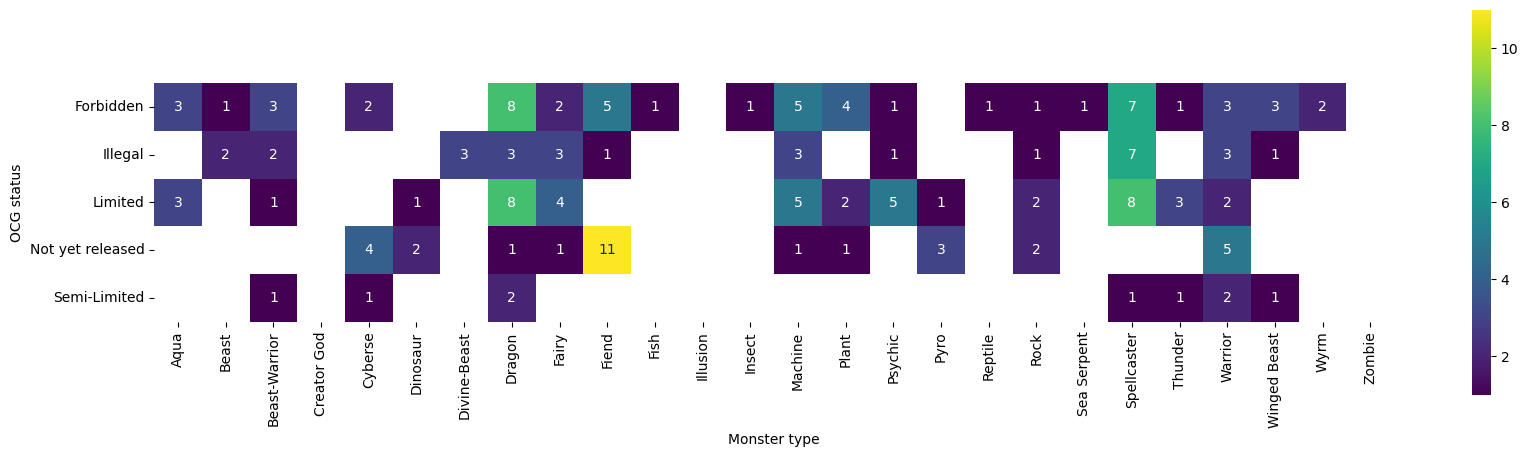

In [109]:
plt.figure(figsize=(20, 5))
sns.heatmap(
    ocg_crosstab_b[ocg_crosstab_b > 0].T,
    annot=True,
    fmt="g",
    cmap="viridis",
    square=True,
)
plt.show()

#### By archseries

In [110]:
# Remove unlimited
ocg_crosstab_c = pd.crosstab(
    exploded_archseries["Archseries"].where(
        exploded_archseries["OCG status"] != "Unlimited"
    ),
    exploded_archseries["OCG status"],
    margins=True,
)
ocg_crosstab_c

OCG status                 Forbidden  Illegal  Limited  Not yet released  \
Archseries                                                                 
-Eyes Dragon                       1        0        0                 0   
Adventurer Token (series)          1        0        0                 0   
Amazoness                          1        0        0                 0   
Ancient Treasure                   0        0        0                 3   
Arcana Force                       0        0        0                 1   
...                              ...      ...      ...               ...   
Zexal                              1        0        0                 0   
Zoodiac                            2        0        2                 0   
roid                               0        0        1                 0   
tellarknight                       0        0        0                 0   
All                               72       33       65                46   

OCG status                 Semi-Limited  All  
Archseries                                    
-Eyes Dragon                          0    1  
Adventurer Token (series)             1    2  
Amazoness                             0    1  
Ancient Treasure                      0    3  
Arcana Force                          0    1  
...                                 ...  ...  
Zexal                                 0    1  
Zoodiac                               0    4  
roid                                  0    1  
tellarknight                          1    1  
All                                  20  236  

[124 rows x 6 columns]

### TCG vs. OCG status

In [111]:
cg_crosstab = pd.crosstab(
    cards_df["OCG status"], cards_df["TCG status"], dropna=False, margins=False
)
cg_crosstab

TCG status    Forbidden  Illegal  Limited  Not yet released  Semi-Limited  \
OCG status                                                                  
Forbidden            71        0        4                 0             0   
Illegal               0       26        0                 0             0   
Limited               9        0       38                 0             0   
Semi-Limited          1        0        7                 0             3   
Unlimited            22        0       32                 5             2   

TCG status    Unlimited  
OCG status               
Forbidden            11  
Illegal               0  
Limited              29  
Semi-Limited         15  
Unlimited         11653

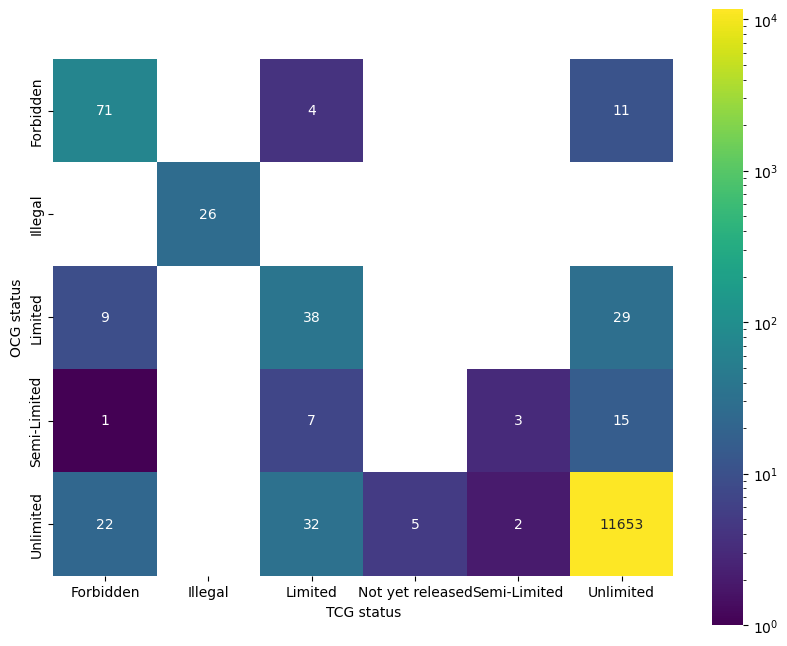

In [112]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    cg_crosstab[cg_crosstab > 0],
    annot=True,
    fmt="g",
    cmap="viridis",
    square=True,
    norm=mc.LogNorm(),
)
plt.show()

# Extras

## Multiple secondary types

In [113]:
cards_df.dropna(subset="Secondary type", axis=0)[
    [len(x) > 1 for x in cards_df["Secondary type"].dropna()]
]

Name  Password     Card type Property  \
9357                   Scapeghost  67284107  Monster Card      NaN   
9524               Shaddoll Falco  37445295  Monster Card      NaN   
11145            Torque Tune Gear  79538761  Monster Card      NaN   
11359  Turbo-Tainted Hot Rod GT19  16769305  Monster Card      NaN   

                  Archseries  \
9357   (Zombie counterpart,)   
9524             (Shaddoll,)   
11145                    NaN   
11359                    NaN   

                                             Effect type TCG status  \
9357                                      (Flip effect,)  Unlimited   
9524            (Condition, Flip effect, Trigger Effect)  Unlimited   
11145  (Continuous-like Effect, Ignition Effect, Igni...  Unlimited   
11359          (Condition, Quick Effect, Trigger Effect)  Unlimited   

      OCG status                   Page name  \
9357   Unlimited                  Scapeghost   
9524   Unlimited              Shaddoll Falco   
11145  Unlimited            Torque Tune Gear   
11359  Unlimited  Turbo-Tainted Hot Rod GT19   

                                                Page URL Artwork  \
9357               https://yugipedia.com/wiki/Scapeghost     NaN   
9524           https://yugipedia.com/wiki/Shaddoll_Falco     NaN   
11145        https://yugipedia.com/wiki/Torque_Tune_Gear     NaN   
11359  https://yugipedia.com/wiki/Turbo-Tainted_Hot_R...     NaN   

        Modification date  Errata Attribute    Primary type  \
9357  2023-03-20 07:07:57  (Any,)      DARK  Effect Monster   
9524  2023-03-20 07:49:31  (Any,)      DARK  Effect Monster   
11145 2023-03-20 15:54:58  (Any,)     LIGHT  Effect Monster   
11359 2023-03-20 16:55:36     NaN      FIRE  Effect Monster   

                       Secondary type Monster type   DEF Pendulum Scale Link  \
9357    (Flip monster, Tuner monster)       Zombie     0            NaN  NaN   
9524    (Flip monster, Tuner monster)  Spellcaster  1400            NaN  NaN   
11145  (Tuner monster, Union monster)      Machine     0            NaN  NaN   
11359   (Flip monster, Tuner monster)      Machine  1500            NaN  NaN   

      Link Arrows  ATK Level/Rank  
9357          NaN    0          1  
9524          NaN  600          2  
11145         NaN    0          1  
11359         NaN  500          3

## Not yet released

In [114]:
cards_df.loc[cards_df["OCG status"] == "Not yet released"].loc[
    full_df["TCG status"] == "Not yet released"
]

Empty DataFrame
Columns: [Name, Password, Card type, Property, Archseries, Effect type, TCG status, OCG status, Page name, Page URL, Artwork, Modification date, Errata, Attribute, Primary type, Secondary type, Monster type, DEF, Pendulum Scale, Link, Link Arrows, ATK, Level/Rank]
Index: []

## Counters and Tokens

In [115]:
counter_df.dropna(how="all", axis=1)

Name Card type TCG status  \
0                                Albaz the Shrouded   Counter      Legal   
1                               Aluber the Dogmatic   Counter      Legal   
2                             Black Feather Counter   Counter      Legal   
3                                           Counter   Counter        NaN   
4                               Ecclesia the Exiled   Counter      Legal   
5                                     Emperor's Key   Counter        NaN   
6   Jesse Anderson - Bonder with the Crystal Beasts   Counter      Legal   
7            Jesse and Ruby - Unleashing the Legend   Counter      Legal   
8                                  Predator Counter   Counter        NaN   
9                                     Spell Counter   Counter        NaN   
10                                      Tri-Brigade   Counter      Legal   
11                             The Virtuous Vestals   Counter      Legal   
12                                    Wedge Counter   Counter        NaN   

   OCG status                                        Page name  \
0       Legal                               Albaz the Shrouded   
1       Legal                              Aluber the Dogmatic   
2       Legal                     Black Feather Counter (card)   
3       Legal                                   Counter (card)   
4       Legal                              Ecclesia the Exiled   
5       Legal                             Emperor's Key (card)   
6       Legal  Jesse Anderson - Bonder with the Crystal Beasts   
7       Legal           Jesse and Ruby - Unleashing the Legend   
8       Legal                          Predator Counter (card)   
9       Legal                             Spell Counter (card)   
10      Legal                               Tri-Brigade (card)   
11      Legal                             The Virtuous Vestals   
12      Legal                             Wedge Counter (card)   

                                             Page URL   Modification date  
0       https://yugipedia.com/wiki/Albaz_the_Shrouded 2023-03-23 09:39:57  
1      https://yugipedia.com/wiki/Aluber_the_Dogmatic 2023-03-23 09:40:16  
2   https://yugipedia.com/wiki/Black_Feather_Count... 2023-03-23 09:44:27  
3           https://yugipedia.com/wiki/Counter_(card) 2019-12-07 22:56:43  
4      https://yugipedia.com/wiki/Ecclesia_the_Exiled 2023-03-23 10:20:22  
5   https://yugipedia.com/wiki/Emperor%27s_Key_(card) 2023-04-02 14:39:53  
6   https://yugipedia.com/wiki/Jesse_Anderson_-_Bo... 2023-03-23 10:40:21  
7   https://yugipedia.com/wiki/Jesse_and_Ruby_-_Un... 2023-03-23 10:40:34  
8   https://yugipedia.com/wiki/Predator_Counter_(c... 2023-04-13 21:46:47  
9     https://yugipedia.com/wiki/Spell_Counter_(card) 2019-12-08 00:23:04  
10      https://yugipedia.com/wiki/Tri-Brigade_(card) 2023-03-23 12:43:32  
11    https://yugipedia.com/wiki/The_Virtuous_Vestals 2023-03-23 12:39:48  
12    https://yugipedia.com/wiki/Wedge_Counter_(card) 2019-12-08 00:39:31

# Page name differs from card name

In [116]:
full_df[full_df["Name"] != full_df["Page name"]]

Name  Password     Card type  \
385                                  Ancient Gear  31557782  Monster Card   
1052                        Black Feather Counter       NaN       Counter   
1060                         Black Luster Soldier       NaN  Monster Card   
1455                                 Burning Soul  10723472    Spell Card   
1954                                      Counter       NaN       Counter   
...                                           ...       ...           ...   
11523                                   Tyhone #2  56789759  Monster Card   
12048                               Wedge Counter       NaN       Counter   
12153  Winged Dragon, Guardian of the Fortress #1  87796900  Monster Card   
12154  Winged Dragon, Guardian of the Fortress #2  57405307  Monster Card   
12491                               Zera the Mant       NaN  Monster Card   

                    Property                                 Archseries  \
385                      NaN                            (Ancient Gear,)   
1052                     NaN                                        NaN   
1060                     NaN  (Black Luster Soldier (archetype), Chaos)   
1455   Quick-Play Spell Card                                        NaN   
1954                     NaN                                        NaN   
...                      ...                                        ...   
11523                    NaN                                        NaN   
12048                    NaN                                        NaN   
12153                    NaN                                        NaN   
12154                    NaN                                        NaN   
12491                    NaN                                    (Zera,)   

                                             Effect type TCG status  \
385                               (Unclassified effect,)  Unlimited   
1052                                                 NaN      Legal   
1060                                                 NaN        NaN   
1455   (Activation condition, Condition, Effect, Ling...  Unlimited   
1954                                                 NaN        NaN   
...                                                  ...        ...   
11523                                                NaN  Unlimited   
12048                                                NaN        NaN   
12153                                                NaN  Unlimited   
12154                                                NaN  Unlimited   
12491                                                NaN        NaN   

      OCG status                                  Page name  \
385    Unlimited                        Ancient Gear (card)   
1052       Legal               Black Feather Counter (card)   
1060   Unlimited              Black Luster Soldier (Normal)   
1455   Unlimited                        Burning Soul (card)   
1954       Legal                             Counter (card)   
...          ...                                        ...   
11523  Unlimited                                   Tyhone 2   
12048      Legal                       Wedge Counter (card)   
12153  Unlimited  Winged Dragon, Guardian of the Fortress 1   
12154  Unlimited  Winged Dragon, Guardian of the Fortress 2   
12491  Unlimited                     Zera the Mant (Normal)   

                                                Page URL Artwork  \
385       https://yugipedia.com/wiki/Ancient_Gear_(card)     NaN   
1052   https://yugipedia.com/wiki/Black_Feather_Count...     NaN   
1060   https://yugipedia.com/wiki/Black_Luster_Soldie...     NaN   
1455      https://yugipedia.com/wiki/Burning_Soul_(card)     NaN   
1954           https://yugipedia.com/wiki/Counter_(card)     NaN   
...                                                  ...     ...   
11523                https://yugipedia.com/wiki/Tyhone_2     NaN   
12048    https://yugipedia.com/wiki/Wedge_Counter_(card)     NaN 

# Epilogue

In [117]:
benchmark("cards", timestamp)

In [118]:
footer(timestamp)

<div align='right'>
    Execution completed 14/05/2023 12:13 UTC
</div>

## HTML export

In [119]:
# Save notebook on disck before generating HTML report
save_notebook()

Notebook saved to disk

In [120]:
! jupyter nbconvert Cards.ipynb --output-dir='../' --to=HTML --TagRemovePreprocessor.enabled=True --TagRemovePreprocessor.remove_cell_tags='exclude' --TemplateExporter.exclude_input=True --TemplateExporter.exclude_input_prompt=True --TemplateExporter.exclude_output_prompt=True

[NbConvertApp] Converting notebook Cards.ipynb to HTML


[NbConvertApp] Writing 4597804 bytes to ../Cards.html


## Git

In [ ]:
! git add "../*[Cc]ards*"

In [ ]:
! git commit -m {"'Cards update-" + timestamp.isoformat() + "'"}